# Kaggle House Price Prediction - Advanced Regression

### Problem Statement :

Ask a home buyer to describe their dream house, and they probably won't begin with the height of the basement ceiling or the proximity to an east-west railroad. But this playground competition's dataset proves that much more influences price negotiations than the number of bedrooms or a white-picket fence.

With 79 explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa, this competition challenges you to predict the final price of each home.

A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file below.

The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

### Assignment Goal :

The company wants to know :

1. Which variables are significant in predicting the price of a house, and
2. How well those variables describe the price of a house.

It is your job to predict the sales price for each house. For each Id in the test set, you must predict the value of the SalePrice variable. 

### Business Goal :

You are required to model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

### Submission Format :

The file should contain a header and have the following format:

Id, SalePrice

1461,169000.1

1462,187724.1233

1463,175221

etc.

You can download an example submission file (sample_submission.csv) on the Data page.

### Data Provided :

1. train.csv - the training set
2. test.csv - the test set
3. data_description.txt - full description of each column, originally prepared by Dean De Cock but lightly edited to match the column names used here
4. sample_submission.csv - a benchmark submission from a linear regression on year and month of sale, lot square footage, and number of bedrooms

## Advanced Regression

THE STEPS FOLLOWED FOR THE ADVANCED REGRESSION IN THIS ASSIGNMENT IS AS FOLLOWS :

1. Data Sourcing
2. Data Understanding
3. Data Cleaning
4. Data Visualisation(EDA)
5. Data Preparation
6. Feature Rescaling and Extraction
7. Model Building and Evaluation(using RIDGE and LASSO)
8. Conclusion

Let's follow the steps as mentioned above!

### Step 1 : Data Sourcing

Let's begin with importing the necessary libraries.

In [1]:
#numpy and pandas for python data structures
import numpy as np
import pandas as pd

#seaborn and matplotlib for plotting
import matplotlib.pyplot as plt
import seaborn as sns

#for rescaling and splitting
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split

#sci-kit learn libraries for model building
from sklearn import linear_model
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error as MSE
from sklearn.model_selection import GridSearchCV

import os

#hide warnings
import warnings
warnings.filterwarnings('ignore')

To maximize the output rows and columns. 

In [2]:
#setting 50 rows & columns to show in the output clearly

pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 50)

In [3]:
#reading the given dataset

housing = pd.read_csv(r'train.csv')
housing.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,...,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,...,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,...,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,...,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,...,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,...,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
housing.shape

(1460, 81)

### Step 2 : Data Understanding

The dataset named "train.csv" file is provided, now let's understand the data given to whether there exist some missing value or not, whether the datatype is perfectly done or not, etc. 

Also, a point to be noted, as per reading the dataset and the whole problem statement of the assignment, we come to know that, the target variable of the dateset is "SalePrice".

In [5]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

We can see there are few variables contain some sort of missing values as there is less number of not-null values in the columns. We'll handle them shortly. 

As, firstly, let's check the other arithmetic status, like mean, standard deviation, and percentiles, using one command for all, that is, describe().

In [6]:
housing.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


Let's now proceed to handle the null values.

In [7]:
#checking the variables which has true null values

true_null = housing.isnull().any()[housing.isnull().any()==True]
true_null

LotFrontage     True
Alley           True
MasVnrType      True
MasVnrArea      True
BsmtQual        True
BsmtCond        True
BsmtExposure    True
BsmtFinType1    True
BsmtFinType2    True
Electrical      True
FireplaceQu     True
GarageType      True
GarageYrBlt     True
GarageFinish    True
GarageQual      True
GarageCond      True
PoolQC          True
Fence           True
MiscFeature     True
dtype: bool

In [8]:
housing.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

So, from step 2 we concluded that the dataset given to us has perfectly initialise the data types to each columns. There are 1460 enteries that is the columns. But few columns carry missing values or an inappropriate values. Let's try to clean them first.

### Step 3 : Data Cleaning

Various ways to handle the data while cleaning the dataset : 

1. categorical columns
2. numerical attributes
3. treating outliers
4. check for duplicates

First let's check the status of the missing values in the given dataset.

In [9]:
#checking for null values
housing.isnull().sum(axis=0)

#null values on percentage wise
print(round(100*(housing.isnull().sum()/len(housing.index)), 2))

Id                0.00
MSSubClass        0.00
MSZoning          0.00
LotFrontage      17.74
LotArea           0.00
                 ...  
MoSold            0.00
YrSold            0.00
SaleType          0.00
SaleCondition     0.00
SalePrice         0.00
Length: 81, dtype: float64


In [10]:
#finding columns in housing file containing more than zero NaN/null values

housing_with_null = housing.isnull().sum().sort_values()
housing_with_null.loc[housing_with_null>0]

Electrical         1
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
BsmtFinType2      38
BsmtExposure      38
GarageQual        81
GarageFinish      81
GarageYrBlt       81
GarageType        81
GarageCond        81
LotFrontage      259
FireplaceQu      690
Fence           1179
Alley           1369
MiscFeature     1406
PoolQC          1453
dtype: int64

In [11]:
col0 = housing.GarageQual.unique()
print("GarageQual:", col0,'\n')

col1 = housing.GarageFinish.unique()
print("GarageFinish:", col1,'\n')

col2 = housing.GarageType.unique()
print("GarageType:",col2,'\n')

col3 = housing.GarageYrBlt.unique()
print("GarageYrBlt:",col3,'\n')

col4 = housing.LotFrontage.unique()
print("LotFrontage:",col4,'\n')

col5 = housing.FireplaceQu.unique()
print("FireplaceQu:",col5)

col6 = housing.GarageCond.unique()
print("GarageCond:",col6)

col7 = housing.BsmtExposure.unique()
print("BsmtExposure:",col7)

col8 = housing.BsmtFinType2.unique()
print("BsmtFinType2:",col8)

col9 = housing.BsmtCond.unique()
print("BsmtCond:",col9)

col10 = housing.BsmtQual.unique()
print("BsmtQual:",col10)

col11 = housing.MasVnrArea.unique()
print("MasVnrArea:",col11)

col12 = housing.MasVnrType.unique()
print("MasVnrType:",col12)

col13 = housing.Electrical.unique()
print("Electrical:",col13)

GarageQual: ['TA' 'Fa' 'Gd' nan 'Ex' 'Po'] 

GarageFinish: ['RFn' 'Unf' 'Fin' nan] 

GarageType: ['Attchd' 'Detchd' 'BuiltIn' 'CarPort' nan 'Basment' '2Types'] 

GarageYrBlt: [2003. 1976. 2001. 1998. 2000. 1993. 2004. 1973. 1931. 1939. 1965. 2005.
 1962. 2006. 1960. 1991. 1970. 1967. 1958. 1930. 2002. 1968. 2007. 2008.
 1957. 1920. 1966. 1959. 1995. 1954. 1953.   nan 1983. 1977. 1997. 1985.
 1963. 1981. 1964. 1999. 1935. 1990. 1945. 1987. 1989. 1915. 1956. 1948.
 1974. 2009. 1950. 1961. 1921. 1900. 1979. 1951. 1969. 1936. 1975. 1971.
 1923. 1984. 1926. 1955. 1986. 1988. 1916. 1932. 1972. 1918. 1980. 1924.
 1996. 1940. 1949. 1994. 1910. 1978. 1982. 1992. 1925. 1941. 2010. 1927.
 1947. 1937. 1942. 1938. 1952. 1928. 1922. 1934. 1906. 1914. 1946. 1908.
 1929. 1933.] 

LotFrontage: [ 65.  80.  68.  60.  84.  85.  75.  nan  51.  50.  70.  91.  72.  66.
 101.  57.  44. 110.  98.  47. 108. 112.  74. 115.  61.  48.  33.  52.
 100.  24.  89.  63.  76.  81.  95.  69.  21.  32.  78. 121. 122.  40.

Let's handle the columns based on their type, like categorical, numerical etc. 

##### Handling the Categorical Columns

Beginning with the categorical variables!!

In [12]:
#checking the columns of datatype = object, if the variabls contain more than 0 null values.

housing.select_dtypes(include = "object").isnull().sum()[housing.select_dtypes(include = "object").isnull().sum()>0]

Alley           1369
MasVnrType         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [13]:
#storing all the categorical variables in one variable
null_columns = ('Alley', 'MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'FireplaceQu', 
            'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature', 'Electrical')


#replacing all the unwanted null values as "na"
for col in null_columns:
    housing[col]=housing[col].fillna('na')
    
housing.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,...,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,na,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,...,0,na,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,na,na,na,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,na,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,...,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,na,na,na,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,na,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,...,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,na,na,na,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,na,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,...,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,na,na,na,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,na,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,...,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,na,na,na,0,12,2008,WD,Normal,250000


In [14]:
#checking is there any categorical variable left to be analysed 

missingval = round(100*(housing.isnull().sum()/len(housing.Id)), 2)
missingval.loc[missingval > 0]

LotFrontage    17.74
MasVnrArea      0.55
GarageYrBlt     5.55
dtype: float64

Removing the columns which has more than 80% na values as these values will be skewed at one side, so dropping such columns will bring more accurate results. So, for removing such data housing dataframe which has more than 80% similar data is removed, including 'na'. Perhaps, 80%=(1241/1460)*100. Hence, the housing more than or equal to 1241 will be removed.

In [15]:
column=[]
cat_cols = housing.select_dtypes(include=['object'])
for col in (cat_cols):
    if(housing[col].value_counts().max() >= 1241):
        column.append(col)

column

['Street',
 'Alley',
 'LandContour',
 'Utilities',
 'LandSlope',
 'Condition1',
 'Condition2',
 'RoofMatl',
 'ExterCond',
 'BsmtCond',
 'BsmtFinType2',
 'Heating',
 'CentralAir',
 'Electrical',
 'Functional',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'MiscFeature',
 'SaleType']

In [16]:
#remove the columns with skewed data

housing.drop(column, axis = 1, inplace = True)
housing.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,...,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Reg,Inside,CollgCr,1Fam,2Story,7,5,2003,2003,Gable,VinylSd,VinylSd,BrkFace,196.0,Gd,PConc,Gd,No,GLQ,706,...,2,1,3,1,Gd,8,0,na,Attchd,2003.0,RFn,2,548,0,61,0,0,0,0,na,0,2,2008,Normal,208500
1,2,20,RL,80.0,9600,Reg,FR2,Veenker,1Fam,1Story,6,8,1976,1976,Gable,MetalSd,MetalSd,None,0.0,TA,CBlock,Gd,Gd,ALQ,978,...,2,0,3,1,TA,6,1,TA,Attchd,1976.0,RFn,2,460,298,0,0,0,0,0,na,0,5,2007,Normal,181500
2,3,60,RL,68.0,11250,IR1,Inside,CollgCr,1Fam,2Story,7,5,2001,2002,Gable,VinylSd,VinylSd,BrkFace,162.0,Gd,PConc,Gd,Mn,GLQ,486,...,2,1,3,1,Gd,6,1,TA,Attchd,2001.0,RFn,2,608,0,42,0,0,0,0,na,0,9,2008,Normal,223500
3,4,70,RL,60.0,9550,IR1,Corner,Crawfor,1Fam,2Story,7,5,1915,1970,Gable,Wd Sdng,Wd Shng,None,0.0,TA,BrkTil,TA,No,ALQ,216,...,1,0,3,1,Gd,7,1,Gd,Detchd,1998.0,Unf,3,642,0,35,272,0,0,0,na,0,2,2006,Abnorml,140000
4,5,60,RL,84.0,14260,IR1,FR2,NoRidge,1Fam,2Story,8,5,2000,2000,Gable,VinylSd,VinylSd,BrkFace,350.0,Gd,PConc,Gd,Av,GLQ,655,...,2,1,4,1,Gd,9,1,TA,Attchd,2000.0,RFn,3,836,192,84,0,0,0,0,na,0,12,2008,Normal,250000


In [17]:
housing.shape

(1460, 60)

In [18]:
#final checking the null values for categorical variables

housing.select_dtypes(include = "object").isnull().sum()[housing.select_dtypes(include = "object").isnull().sum()>0]

Series([], dtype: int64)

Hence, no null values in any categorical columns.

###### Handling the Numerical Attributes

Let's continue the above steps for numerical variables.

In [19]:
#checking the status of the null values in the numerical variables

housing.select_dtypes(include = ["float","int64"]).isnull().sum()[housing.select_dtypes(include = ["float","int64"]).isnull().sum()>0]

LotFrontage    259
MasVnrArea       8
GarageYrBlt     81
dtype: int64

In [20]:
#checking individual column - MasVnrArea for its value counts

housing.MasVnrArea.value_counts().sort_values()

67.0       1
506.0      1
459.0      1
748.0      1
603.0      1
        ... 
120.0      7
108.0      8
180.0      8
72.0       8
0.0      861
Name: MasVnrArea, Length: 327, dtype: int64

In [21]:
#checking individual column - GarageYrBlt for its value counts

housing.GarageYrBlt.value_counts().sort_values()

1906.0     1
1908.0     1
1900.0     1
1933.0     1
1927.0     1
          ..
2007.0    49
2003.0    50
2004.0    53
2006.0    59
2005.0    65
Name: GarageYrBlt, Length: 97, dtype: int64

In [22]:
#checking individual column - LotFrontage for its value counts

housing.LotFrontage.value_counts().sort_values()

137.0      1
150.0      1
111.0      1
153.0      1
182.0      1
        ... 
75.0      53
50.0      57
80.0      69
70.0      70
60.0     143
Name: LotFrontage, Length: 110, dtype: int64

In [23]:
#impute the null values with median values for LotFrontage and MasVnrArea columns as these two shows the max and min values

housing['LotFrontage'] = housing['LotFrontage'].replace(np.nan, housing['LotFrontage'].median())
housing['MasVnrArea'] = housing['MasVnrArea'].replace(np.nan, housing['MasVnrArea'].median())

In [24]:
housing.shape

(1460, 60)

In [25]:
#setting the null values with 0 for GarageYrBlt for now as we would be handling this column further below

housing['GarageYrBlt']= housing['GarageYrBlt'].fillna(0)
housing['GarageYrBlt'] = housing['GarageYrBlt'].astype(int)

In [26]:
housing.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,...,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Reg,Inside,CollgCr,1Fam,2Story,7,5,2003,2003,Gable,VinylSd,VinylSd,BrkFace,196.0,Gd,PConc,Gd,No,GLQ,706,...,2,1,3,1,Gd,8,0,na,Attchd,2003,RFn,2,548,0,61,0,0,0,0,na,0,2,2008,Normal,208500
1,2,20,RL,80.0,9600,Reg,FR2,Veenker,1Fam,1Story,6,8,1976,1976,Gable,MetalSd,MetalSd,None,0.0,TA,CBlock,Gd,Gd,ALQ,978,...,2,0,3,1,TA,6,1,TA,Attchd,1976,RFn,2,460,298,0,0,0,0,0,na,0,5,2007,Normal,181500
2,3,60,RL,68.0,11250,IR1,Inside,CollgCr,1Fam,2Story,7,5,2001,2002,Gable,VinylSd,VinylSd,BrkFace,162.0,Gd,PConc,Gd,Mn,GLQ,486,...,2,1,3,1,Gd,6,1,TA,Attchd,2001,RFn,2,608,0,42,0,0,0,0,na,0,9,2008,Normal,223500
3,4,70,RL,60.0,9550,IR1,Corner,Crawfor,1Fam,2Story,7,5,1915,1970,Gable,Wd Sdng,Wd Shng,None,0.0,TA,BrkTil,TA,No,ALQ,216,...,1,0,3,1,Gd,7,1,Gd,Detchd,1998,Unf,3,642,0,35,272,0,0,0,na,0,2,2006,Abnorml,140000
4,5,60,RL,84.0,14260,IR1,FR2,NoRidge,1Fam,2Story,8,5,2000,2000,Gable,VinylSd,VinylSd,BrkFace,350.0,Gd,PConc,Gd,Av,GLQ,655,...,2,1,4,1,Gd,9,1,TA,Attchd,2000,RFn,3,836,192,84,0,0,0,0,na,0,12,2008,Normal,250000


##### Handling Year type of columns

Such columns are :
1. GarageYrBlt
2. YearBuilt
3. YearRemodAdd
4. YrSold

In [27]:
#working on column-GarageYrBlt
#assigning 0 and 1 as old and new garage on the basis on the built year

def getGaragePeriod(r):
    if r == 0:
        return 0
    elif r >= 1900 and r < 2000:        
        return 0
    else:   
        return 1
    
housing['OldOrNewGarage'] = housing['GarageYrBlt'].apply(getGaragePeriod)

housing.drop(['GarageYrBlt'], axis = 1, inplace = True)
housing.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,...,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleCondition,SalePrice,OldOrNewGarage
0,1,60,RL,65.0,8450,Reg,Inside,CollgCr,1Fam,2Story,7,5,2003,2003,Gable,VinylSd,VinylSd,BrkFace,196.0,Gd,PConc,Gd,No,GLQ,706,...,2,1,3,1,Gd,8,0,na,Attchd,RFn,2,548,0,61,0,0,0,0,na,0,2,2008,Normal,208500,1
1,2,20,RL,80.0,9600,Reg,FR2,Veenker,1Fam,1Story,6,8,1976,1976,Gable,MetalSd,MetalSd,None,0.0,TA,CBlock,Gd,Gd,ALQ,978,...,2,0,3,1,TA,6,1,TA,Attchd,RFn,2,460,298,0,0,0,0,0,na,0,5,2007,Normal,181500,0
2,3,60,RL,68.0,11250,IR1,Inside,CollgCr,1Fam,2Story,7,5,2001,2002,Gable,VinylSd,VinylSd,BrkFace,162.0,Gd,PConc,Gd,Mn,GLQ,486,...,2,1,3,1,Gd,6,1,TA,Attchd,RFn,2,608,0,42,0,0,0,0,na,0,9,2008,Normal,223500,1
3,4,70,RL,60.0,9550,IR1,Corner,Crawfor,1Fam,2Story,7,5,1915,1970,Gable,Wd Sdng,Wd Shng,None,0.0,TA,BrkTil,TA,No,ALQ,216,...,1,0,3,1,Gd,7,1,Gd,Detchd,Unf,3,642,0,35,272,0,0,0,na,0,2,2006,Abnorml,140000,0
4,5,60,RL,84.0,14260,IR1,FR2,NoRidge,1Fam,2Story,8,5,2000,2000,Gable,VinylSd,VinylSd,BrkFace,350.0,Gd,PConc,Gd,Av,GLQ,655,...,2,1,4,1,Gd,9,1,TA,Attchd,RFn,3,836,192,84,0,0,0,0,na,0,12,2008,Normal,250000,1


In [28]:
#working on YearRemodAdd and YearBuilt wrt YrSold
#finding the year of house built and house remodelled

def BuiltOrRemodelAge(val):
    if(val['YearBuilt'] == val['YearRemodAdd']):
        return val['YrSold'] - val['YearBuilt']
    else:
        return val['YrSold'] - val['YearRemodAdd']
       
housing['BuiltOrRemodelAge'] = housing.apply(BuiltOrRemodelAge, axis=1)

housing.drop(['YrSold'], axis = 1, inplace = True)
housing.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,...,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,SaleCondition,SalePrice,OldOrNewGarage,BuiltOrRemodelAge
0,1,60,RL,65.0,8450,Reg,Inside,CollgCr,1Fam,2Story,7,5,2003,2003,Gable,VinylSd,VinylSd,BrkFace,196.0,Gd,PConc,Gd,No,GLQ,706,...,2,1,3,1,Gd,8,0,na,Attchd,RFn,2,548,0,61,0,0,0,0,na,0,2,Normal,208500,1,5
1,2,20,RL,80.0,9600,Reg,FR2,Veenker,1Fam,1Story,6,8,1976,1976,Gable,MetalSd,MetalSd,None,0.0,TA,CBlock,Gd,Gd,ALQ,978,...,2,0,3,1,TA,6,1,TA,Attchd,RFn,2,460,298,0,0,0,0,0,na,0,5,Normal,181500,0,31
2,3,60,RL,68.0,11250,IR1,Inside,CollgCr,1Fam,2Story,7,5,2001,2002,Gable,VinylSd,VinylSd,BrkFace,162.0,Gd,PConc,Gd,Mn,GLQ,486,...,2,1,3,1,Gd,6,1,TA,Attchd,RFn,2,608,0,42,0,0,0,0,na,0,9,Normal,223500,1,6
3,4,70,RL,60.0,9550,IR1,Corner,Crawfor,1Fam,2Story,7,5,1915,1970,Gable,Wd Sdng,Wd Shng,None,0.0,TA,BrkTil,TA,No,ALQ,216,...,1,0,3,1,Gd,7,1,Gd,Detchd,Unf,3,642,0,35,272,0,0,0,na,0,2,Abnorml,140000,0,36
4,5,60,RL,84.0,14260,IR1,FR2,NoRidge,1Fam,2Story,8,5,2000,2000,Gable,VinylSd,VinylSd,BrkFace,350.0,Gd,PConc,Gd,Av,GLQ,655,...,2,1,4,1,Gd,9,1,TA,Attchd,RFn,3,836,192,84,0,0,0,0,na,0,12,Normal,250000,1,8


In [29]:
#working on YearRemodAdd and YearBuilt
#checking out the relationship between the house was constructed and house was remodelled

def casesForRemodel(case):
    if(case['YearBuilt'] == case['YearRemodAdd']):
        return 0
    elif(case['YearBuilt'] < case['YearRemodAdd']):
        return 1
    else:
        return 2
    
housing['IsRemodelled'] = housing.apply(casesForRemodel, axis=1)

housing.drop(['YearBuilt','YearRemodAdd'], axis = 1, inplace = True)
housing.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,SaleCondition,SalePrice,OldOrNewGarage,BuiltOrRemodelAge,IsRemodelled
0,1,60,RL,65.0,8450,Reg,Inside,CollgCr,1Fam,2Story,7,5,Gable,VinylSd,VinylSd,BrkFace,196.0,Gd,PConc,Gd,No,GLQ,706,0,150,...,1,3,1,Gd,8,0,na,Attchd,RFn,2,548,0,61,0,0,0,0,na,0,2,Normal,208500,1,5,0
1,2,20,RL,80.0,9600,Reg,FR2,Veenker,1Fam,1Story,6,8,Gable,MetalSd,MetalSd,None,0.0,TA,CBlock,Gd,Gd,ALQ,978,0,284,...,0,3,1,TA,6,1,TA,Attchd,RFn,2,460,298,0,0,0,0,0,na,0,5,Normal,181500,0,31,0
2,3,60,RL,68.0,11250,IR1,Inside,CollgCr,1Fam,2Story,7,5,Gable,VinylSd,VinylSd,BrkFace,162.0,Gd,PConc,Gd,Mn,GLQ,486,0,434,...,1,3,1,Gd,6,1,TA,Attchd,RFn,2,608,0,42,0,0,0,0,na,0,9,Normal,223500,1,6,1
3,4,70,RL,60.0,9550,IR1,Corner,Crawfor,1Fam,2Story,7,5,Gable,Wd Sdng,Wd Shng,None,0.0,TA,BrkTil,TA,No,ALQ,216,0,540,...,0,3,1,Gd,7,1,Gd,Detchd,Unf,3,642,0,35,272,0,0,0,na,0,2,Abnorml,140000,0,36,1
4,5,60,RL,84.0,14260,IR1,FR2,NoRidge,1Fam,2Story,8,5,Gable,VinylSd,VinylSd,BrkFace,350.0,Gd,PConc,Gd,Av,GLQ,655,0,490,...,1,4,1,Gd,9,1,TA,Attchd,RFn,3,836,192,84,0,0,0,0,na,0,12,Normal,250000,1,8,0


Removing the columns which has more than 70% na values as these values will be skewed at one side, so dropping such columns will bring more accurate results. So, for removing such data housing dataframe which has more than 70% similar data is removed, including 'na'. Perhaps, 70%=(1022/1460)*100. Hence, the housing more than or equal to 1022 will be removed.

In [30]:
column1=[]
num_cols = housing.select_dtypes(include=['int64', 'float'])
for col in (num_cols):
    if(housing[col].value_counts().max() >= 1241):
        column1.append(col)

column1

['BsmtFinSF2',
 'LowQualFinSF',
 'BsmtHalfBath',
 'KitchenAbvGr',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal']

In [31]:
#remove the columns with skewed data

housing.drop(column1, axis = 1, inplace = True)
housing.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,Fence,MoSold,SaleCondition,SalePrice,OldOrNewGarage,BuiltOrRemodelAge,IsRemodelled
0,1,60,RL,65.0,8450,Reg,Inside,CollgCr,1Fam,2Story,7,5,Gable,VinylSd,VinylSd,BrkFace,196.0,Gd,PConc,Gd,No,GLQ,706,150,856,Ex,856,854,1710,1,2,1,3,Gd,8,0,na,Attchd,RFn,2,548,0,61,na,2,Normal,208500,1,5,0
1,2,20,RL,80.0,9600,Reg,FR2,Veenker,1Fam,1Story,6,8,Gable,MetalSd,MetalSd,None,0.0,TA,CBlock,Gd,Gd,ALQ,978,284,1262,Ex,1262,0,1262,0,2,0,3,TA,6,1,TA,Attchd,RFn,2,460,298,0,na,5,Normal,181500,0,31,0
2,3,60,RL,68.0,11250,IR1,Inside,CollgCr,1Fam,2Story,7,5,Gable,VinylSd,VinylSd,BrkFace,162.0,Gd,PConc,Gd,Mn,GLQ,486,434,920,Ex,920,866,1786,1,2,1,3,Gd,6,1,TA,Attchd,RFn,2,608,0,42,na,9,Normal,223500,1,6,1
3,4,70,RL,60.0,9550,IR1,Corner,Crawfor,1Fam,2Story,7,5,Gable,Wd Sdng,Wd Shng,None,0.0,TA,BrkTil,TA,No,ALQ,216,540,756,Gd,961,756,1717,1,1,0,3,Gd,7,1,Gd,Detchd,Unf,3,642,0,35,na,2,Abnorml,140000,0,36,1
4,5,60,RL,84.0,14260,IR1,FR2,NoRidge,1Fam,2Story,8,5,Gable,VinylSd,VinylSd,BrkFace,350.0,Gd,PConc,Gd,Av,GLQ,655,490,1145,Ex,1145,1053,2198,1,2,1,4,Gd,9,1,TA,Attchd,RFn,3,836,192,84,na,12,Normal,250000,1,8,0


As, we will drop 'MoSold' because this column will not be used in any of the further analysis

In [32]:
housing.drop(['MoSold'], axis = 1, inplace = True)
housing.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,Fence,SaleCondition,SalePrice,OldOrNewGarage,BuiltOrRemodelAge,IsRemodelled
0,1,60,RL,65.0,8450,Reg,Inside,CollgCr,1Fam,2Story,7,5,Gable,VinylSd,VinylSd,BrkFace,196.0,Gd,PConc,Gd,No,GLQ,706,150,856,Ex,856,854,1710,1,2,1,3,Gd,8,0,na,Attchd,RFn,2,548,0,61,na,Normal,208500,1,5,0
1,2,20,RL,80.0,9600,Reg,FR2,Veenker,1Fam,1Story,6,8,Gable,MetalSd,MetalSd,None,0.0,TA,CBlock,Gd,Gd,ALQ,978,284,1262,Ex,1262,0,1262,0,2,0,3,TA,6,1,TA,Attchd,RFn,2,460,298,0,na,Normal,181500,0,31,0
2,3,60,RL,68.0,11250,IR1,Inside,CollgCr,1Fam,2Story,7,5,Gable,VinylSd,VinylSd,BrkFace,162.0,Gd,PConc,Gd,Mn,GLQ,486,434,920,Ex,920,866,1786,1,2,1,3,Gd,6,1,TA,Attchd,RFn,2,608,0,42,na,Normal,223500,1,6,1
3,4,70,RL,60.0,9550,IR1,Corner,Crawfor,1Fam,2Story,7,5,Gable,Wd Sdng,Wd Shng,None,0.0,TA,BrkTil,TA,No,ALQ,216,540,756,Gd,961,756,1717,1,1,0,3,Gd,7,1,Gd,Detchd,Unf,3,642,0,35,na,Abnorml,140000,0,36,1
4,5,60,RL,84.0,14260,IR1,FR2,NoRidge,1Fam,2Story,8,5,Gable,VinylSd,VinylSd,BrkFace,350.0,Gd,PConc,Gd,Av,GLQ,655,490,1145,Ex,1145,1053,2198,1,2,1,4,Gd,9,1,TA,Attchd,RFn,3,836,192,84,na,Normal,250000,1,8,0


In [33]:
housing.shape

(1460, 49)

In [34]:
#check for percentage of null values in each column

missing_val = round(100*(housing.isnull().sum()/len(housing.index)), 2)
print(missing_val)

Id                   0.0
MSSubClass           0.0
MSZoning             0.0
LotFrontage          0.0
LotArea              0.0
LotShape             0.0
LotConfig            0.0
Neighborhood         0.0
BldgType             0.0
HouseStyle           0.0
OverallQual          0.0
OverallCond          0.0
RoofStyle            0.0
Exterior1st          0.0
Exterior2nd          0.0
MasVnrType           0.0
MasVnrArea           0.0
ExterQual            0.0
Foundation           0.0
BsmtQual             0.0
BsmtExposure         0.0
BsmtFinType1         0.0
BsmtFinSF1           0.0
BsmtUnfSF            0.0
TotalBsmtSF          0.0
HeatingQC            0.0
1stFlrSF             0.0
2ndFlrSF             0.0
GrLivArea            0.0
BsmtFullBath         0.0
FullBath             0.0
HalfBath             0.0
BedroomAbvGr         0.0
KitchenQual          0.0
TotRmsAbvGrd         0.0
Fireplaces           0.0
FireplaceQu          0.0
GarageType           0.0
GarageFinish         0.0
GarageCars           0.0


Great!! No more missing values left to be treated. Let's now check duplicates and outliers.

In [35]:
housing.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'LotShape',
       'LotConfig', 'Neighborhood', 'BldgType', 'HouseStyle', 'OverallQual',
       'OverallCond', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'Foundation', 'BsmtQual', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC',
       '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Fireplaces',
       'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageCars', 'GarageArea',
       'WoodDeckSF', 'OpenPorchSF', 'Fence', 'SaleCondition', 'SalePrice',
       'OldOrNewGarage', 'BuiltOrRemodelAge', 'IsRemodelled'],
      dtype='object')

###### Checking Duplicates

Firstly, we have to handle the duplicates before any outlier treatment, because of avoiding more number of the duplicate outliers.

In [36]:
#check if there are any duplicate values in the dataset

housing[housing.duplicated(keep=False)]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,Fence,SaleCondition,SalePrice,OldOrNewGarage,BuiltOrRemodelAge,IsRemodelled


Hence, no duplicates found. Let's now work on the outliers.

###### Treating Outliers

Let's now treat the outliers!!

In [37]:
#Finding details regarding all numeric fields

housing.describe(percentiles = [0.15,0.25,0.30,0.40,0.45,0.50,0.60,0.75,0.80,0.90,0.99])

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,SalePrice,OldOrNewGarage,BuiltOrRemodelAge,IsRemodelled
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,69.863699,10516.828082,6.099315,5.575342,103.117123,443.639726,567.240411,1057.429452,1162.626712,346.992466,1515.463699,0.425342,1.565068,0.382877,2.866438,6.517808,0.613014,1.767123,472.980137,94.244521,46.660274,180921.195890,0.275342,22.950000,0.476712
std,421.610009,42.300571,22.027677,9981.264932,1.382997,1.112799,180.731373,456.098091,441.866955,438.705324,386.587738,436.528436,525.480383,0.518911,0.550916,0.502885,0.815778,1.625393,0.644666,0.747315,213.804841,125.338794,66.256028,79442.502883,0.446840,20.640653,0.499629
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,34900.000000,0.000000,-1.000000,0.000000
15%,219.850000,20.000000,51.000000,6120.000000,5.000000,5.000000,0.000000,0.000000,121.850000,701.700000,804.000000,0.000000,988.000000,0.000000,1.000000,0.000000,2.000000,5.000000,0.000000,1.000000,272.700000,0.000000,0.000000,115000.000000,0.000000,2.000000,0.000000
25%,365.750000,20.000000,60.000000,7553.500000,5.000000,5.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,1129.500000,0.000000,1.000000,0.000000,2.000000,5.000000,0.000000,1.000000,334.500000,0.000000,0.000000,129975.000000,0.000000,4.000000,0.000000
30%,438.700000,20.000000,60.000000,8063.700000,5.000000,5.000000,0.000000,0.000000,280.000000,840.000000,915.700000,0.000000,1208.000000,0.000000,1.000000,0.000000,3.000000,6.000000,0.000000,1.000000,384.000000,0.000000,0.000000,135500.000000,0.000000,6.000000,0.000000
40%,584.600000,30.000000,68.000000,8793.400000,6.000000,5.000000,0.000000,218.600000,374.600000,910.000000,1000.200000,0.000000,1339.000000,0.000000,1.000000,0.000000,3.000000,6.000000,0.000000,2.000000,440.000000,0.000000,0.000000,147000.000000,0.000000,9.600000,0.000000
45%,657.550000,50.000000,69.000000,9100.000000,6.000000,5.000000,0.000000,312.000000,419.100000,946.650000,1048.000000,0.000000,1392.550000,0.000000,1.000000,0.000000,3.000000,6.000000,0.000000,2.000000,456.000000,0.000000,6.200000,155000.000000,0.000000,12.000000,0.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,0.000000,383.500000,477.500000,991.500000,1087.000000,0.000000,1464.000000,0.000000,2.000000,0.000000,3.000000,6.000000,1.000000,2.000000,480.000000,0.000000,25.000000,163000.000000,0.000000,14.000000,0.000000


In [38]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 49 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Id                 1460 non-null   int64  
 1   MSSubClass         1460 non-null   int64  
 2   MSZoning           1460 non-null   object 
 3   LotFrontage        1460 non-null   float64
 4   LotArea            1460 non-null   int64  
 5   LotShape           1460 non-null   object 
 6   LotConfig          1460 non-null   object 
 7   Neighborhood       1460 non-null   object 
 8   BldgType           1460 non-null   object 
 9   HouseStyle         1460 non-null   object 
 10  OverallQual        1460 non-null   int64  
 11  OverallCond        1460 non-null   int64  
 12  RoofStyle          1460 non-null   object 
 13  Exterior1st        1460 non-null   object 
 14  Exterior2nd        1460 non-null   object 
 15  MasVnrType         1460 non-null   object 
 16  MasVnrArea         1460 

Let's now remove these outliers.

We'll set the quantile on the basis hit and trial method and see that which gives the maximum percentage of outlier removal. Let's also note that there shouldn't be any overfit or underfit cases after the manual arrangement.

In [39]:
#removing values beyond 98% for all the numerical columns

quartile1 = housing['LotArea'].quantile(0.98)
housing = housing[housing["LotArea"] < quartile1]

quartile2 = housing['MasVnrArea'].quantile(0.99)
housing = housing[housing["MasVnrArea"] < quartile2]

quartile3 = housing['TotalBsmtSF'].quantile(0.99)
housing = housing[housing["TotalBsmtSF"] < quartile3]

quartile4 = housing['WoodDeckSF'].quantile(0.99)
housing = housing[housing["WoodDeckSF"] < quartile4]

quartile5 = housing['OpenPorchSF'].quantile(0.99)
housing = housing[housing["OpenPorchSF"] < quartile5]

In [40]:
#determine the percentage of data with outliers

num_data = round(100*(len(housing)/1460),2)
print(num_data)

93.97


We have found that the ratio of 1:4 for 98% and 99% quantiles in order to get the significant result of the outliers, sets the percentage of nearly equal to 94%, which quite nice.

###### Trimmed Dataset

As ID column is not used in any further analysis so, we are deleting that variable.

In [41]:
#trimmed dataset

housing.drop('Id', axis=1, inplace = True)
housing.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,Fence,SaleCondition,SalePrice,OldOrNewGarage,BuiltOrRemodelAge,IsRemodelled
0,60,RL,65.0,8450,Reg,Inside,CollgCr,1Fam,2Story,7,5,Gable,VinylSd,VinylSd,BrkFace,196.0,Gd,PConc,Gd,No,GLQ,706,150,856,Ex,856,854,1710,1,2,1,3,Gd,8,0,na,Attchd,RFn,2,548,0,61,na,Normal,208500,1,5,0
1,20,RL,80.0,9600,Reg,FR2,Veenker,1Fam,1Story,6,8,Gable,MetalSd,MetalSd,None,0.0,TA,CBlock,Gd,Gd,ALQ,978,284,1262,Ex,1262,0,1262,0,2,0,3,TA,6,1,TA,Attchd,RFn,2,460,298,0,na,Normal,181500,0,31,0
2,60,RL,68.0,11250,IR1,Inside,CollgCr,1Fam,2Story,7,5,Gable,VinylSd,VinylSd,BrkFace,162.0,Gd,PConc,Gd,Mn,GLQ,486,434,920,Ex,920,866,1786,1,2,1,3,Gd,6,1,TA,Attchd,RFn,2,608,0,42,na,Normal,223500,1,6,1
3,70,RL,60.0,9550,IR1,Corner,Crawfor,1Fam,2Story,7,5,Gable,Wd Sdng,Wd Shng,None,0.0,TA,BrkTil,TA,No,ALQ,216,540,756,Gd,961,756,1717,1,1,0,3,Gd,7,1,Gd,Detchd,Unf,3,642,0,35,na,Abnorml,140000,0,36,1
4,60,RL,84.0,14260,IR1,FR2,NoRidge,1Fam,2Story,8,5,Gable,VinylSd,VinylSd,BrkFace,350.0,Gd,PConc,Gd,Av,GLQ,655,490,1145,Ex,1145,1053,2198,1,2,1,4,Gd,9,1,TA,Attchd,RFn,3,836,192,84,na,Normal,250000,1,8,0


Let's now go ahead to step 4. 

### Step 4 : Data Visualisation

Here, we'll see the graphical representation of each variables with respect to the target variable. The Target variable of the dataset is "SalePrice".

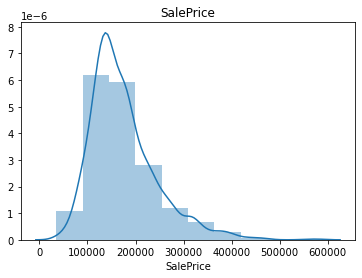

In [42]:
#plotting target variable

plt.title('SalePrice')
sns.distplot(housing['SalePrice'], bins=10)
plt.show()

As we can see that, the values on the axes is not appropriate to judge the change in variance of the variable. Let's try another plot with log of the values in the axes. 

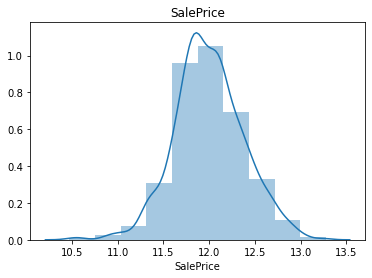

In [43]:
#taking log of the values in both the axes
housing['SalePrice'] = np.log1p(housing['SalePrice'])

#plotting again the target variable
plt.title('SalePrice')
sns.distplot(housing['SalePrice'], bins=10)
plt.show()

Let's now visualise the correlation of each category!

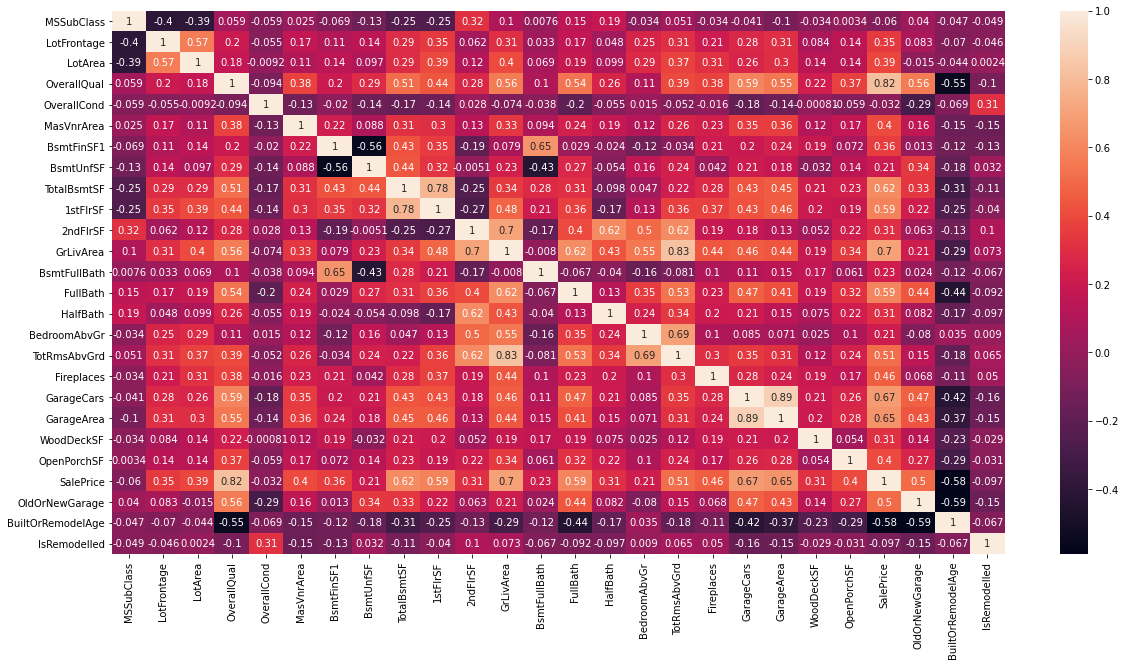

In [44]:
#heatmap for correlation

plt.figure(figsize = (20, 10))
sns.heatmap(housing.corr(), annot = True)
plt.show()

We need to deeply understand the categories, so let's group the variables so as to make it easy to plot for further analysis.

In [45]:
#storing similiar columns together

area = ['MSSubClass','LotFrontage','LotArea']
ovr = ['OverallQual', 'OverallCond','MasVnrArea']
bsmt = ['BsmtFinSF1', 'BsmtUnfSF','TotalBsmtSF']
flr = ['1stFlrSF','2ndFlrSF', 'GrLivArea']
bath = ['BsmtFullBath','FullBath', 'HalfBath']
abv = ['BedroomAbvGr','TotRmsAbvGrd', 'Fireplaces']
garage = ['GarageCars','GarageArea', 'WoodDeckSF']
model = ['OpenPorchSF','BuiltOrRemodelAge', 'IsRemodelled']

<Figure size 720x360 with 0 Axes>

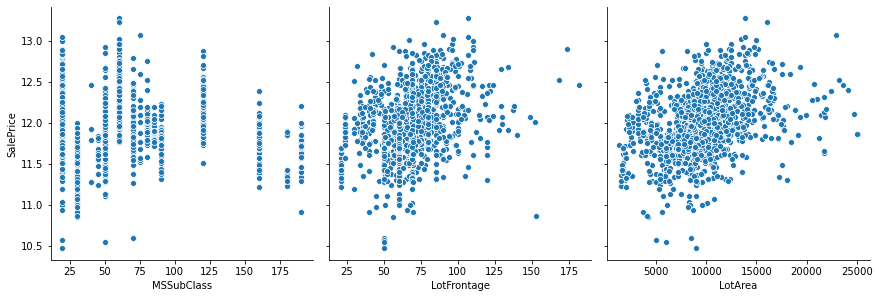

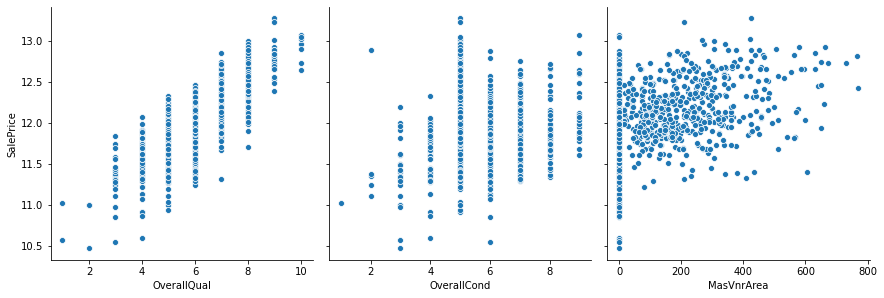

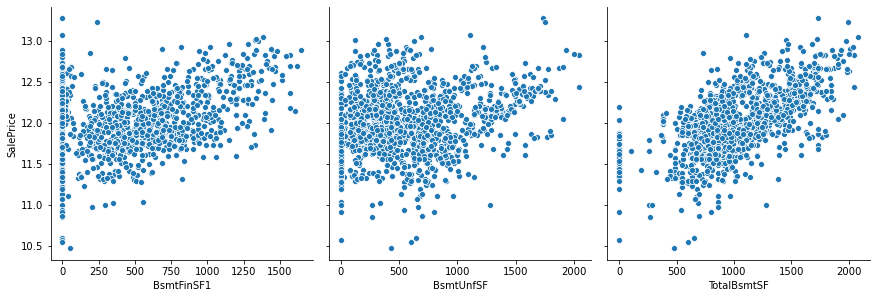

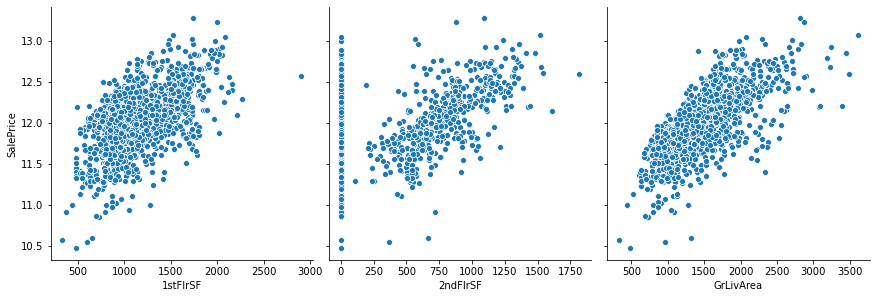

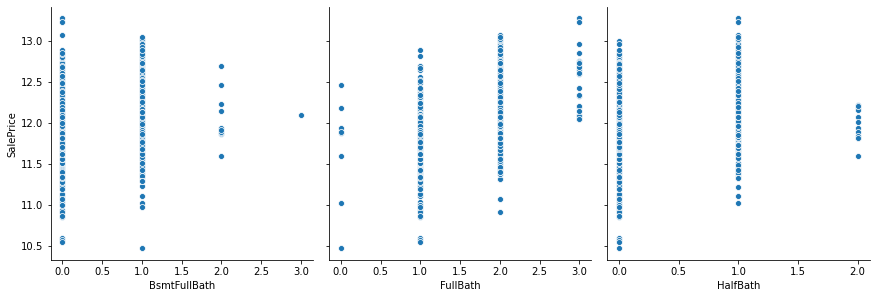

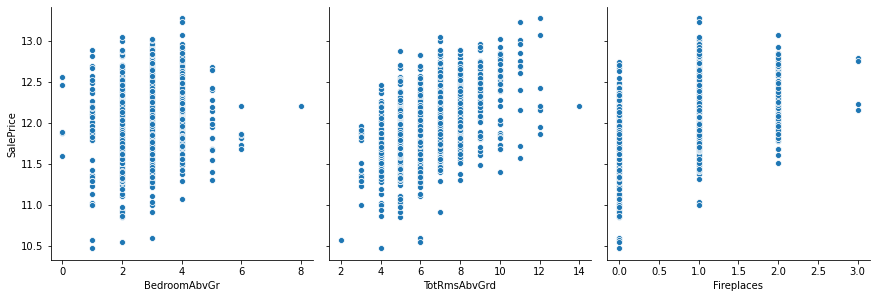

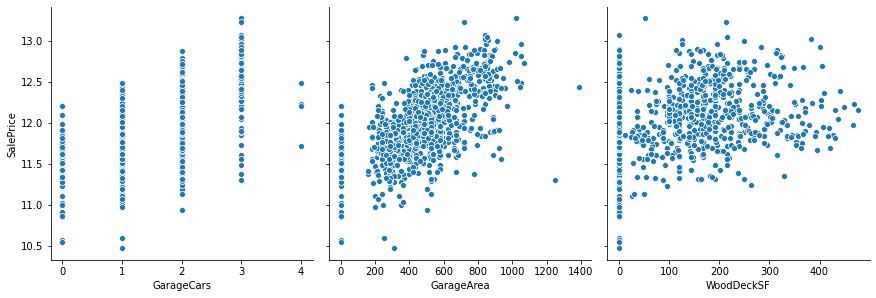

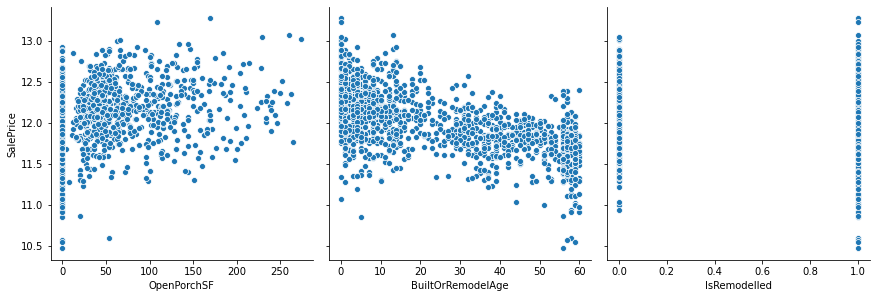

In [46]:
#plotting the above groups in scatter plot

plt.figure(figsize=(10,5))
sns.pairplot(housing, x_vars=area, y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(housing, x_vars=ovr, y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(housing, x_vars=bsmt, y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(housing, x_vars=flr, y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(housing, x_vars=bath, y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(housing, x_vars=abv, y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(housing, x_vars=garage, y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(housing, x_vars=model, y_vars='SalePrice',height=4, aspect=1,kind='scatter')
plt.show()

From the above two types of plotting, that is, heatmap and scatter plot, we can see that there are some variables which are highly correlated to each other. Let's remove such variables.

The highly correlated variables from the heatmap are :
1. 89% - GarbageCars and GarbageArea
2. 83% - GrLivArea and TotRmsAbvGrd
3. 82% - OverallQual and SalePrice (ignoring this as this is connected to the target variable)

Now to maintain the correlation property, we will discard one variable from each of the two pairs, so as not to make the correlation differ much in other variables.

In [47]:
#deleting the highly correlated columns

housing.drop(['TotRmsAbvGrd', 'GarageArea'], axis = 1, inplace = True)

Let's now see the scatterplot for the other variables.

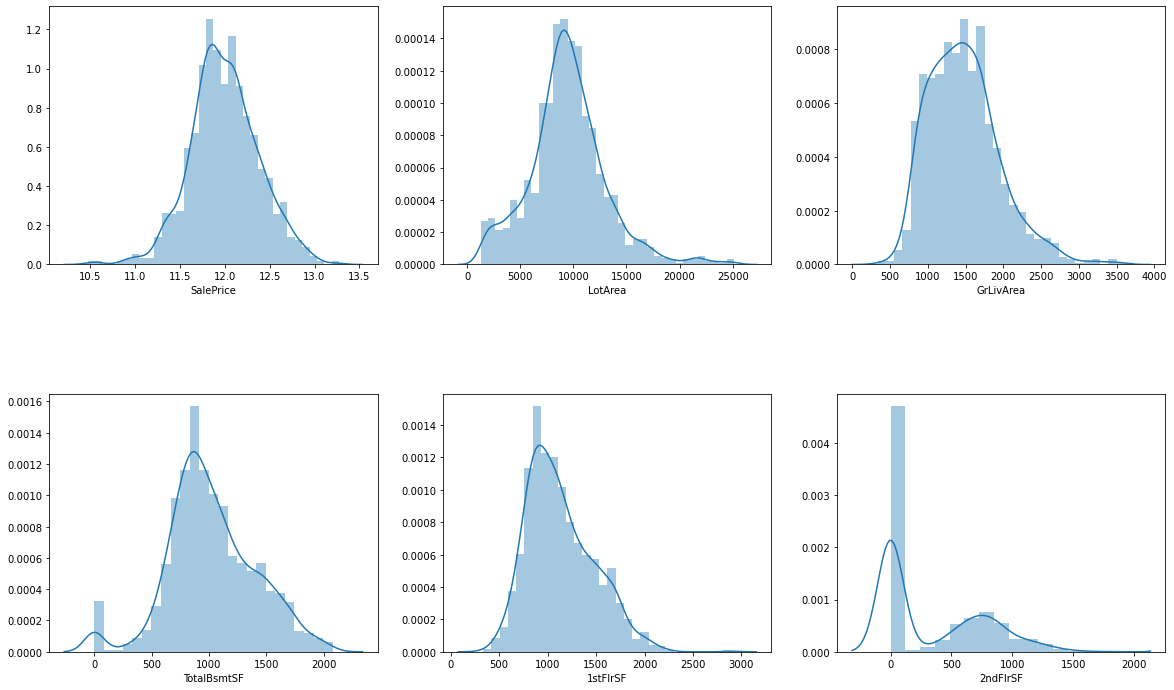

In [48]:
#Creating subplots for all the other features in the dataframe
plt.figure(figsize=(20,19))

plt.subplot(3,3,1)
sns.distplot(housing['SalePrice'])
 
plt.subplot(3,3,2)
sns.distplot(housing['LotArea'])

plt.subplot(3,3,3)
sns.distplot(housing['GrLivArea'])

plt.subplot(3,3,4)
sns.distplot(housing['TotalBsmtSF'])

plt.subplot(3,3,5)
sns.distplot(housing['1stFlrSF'])
 
plt.subplot(3,3,6)
sns.distplot(housing['2ndFlrSF'])

plt.subplots_adjust(hspace=0.5)
plt.show()

In [49]:
housing.shape

(1372, 46)

In [50]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1372 entries, 0 to 1458
Data columns (total 46 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   MSSubClass         1372 non-null   int64  
 1   MSZoning           1372 non-null   object 
 2   LotFrontage        1372 non-null   float64
 3   LotArea            1372 non-null   int64  
 4   LotShape           1372 non-null   object 
 5   LotConfig          1372 non-null   object 
 6   Neighborhood       1372 non-null   object 
 7   BldgType           1372 non-null   object 
 8   HouseStyle         1372 non-null   object 
 9   OverallQual        1372 non-null   int64  
 10  OverallCond        1372 non-null   int64  
 11  RoofStyle          1372 non-null   object 
 12  Exterior1st        1372 non-null   object 
 13  Exterior2nd        1372 non-null   object 
 14  MasVnrType         1372 non-null   object 
 15  MasVnrArea         1372 non-null   float64
 16  ExterQual          1372 

Our next step is preparing the data!

### Step 5 : Data Preparation

The two steps are mainly followed here -
1. Converting categorical values into numerical values
2. Creating dummy variables

In [51]:
housing.shape

(1372, 46)

Let's check the unique values of each categorical variables so as to change them accordingly.

###### Converting the categorical variable into numerial variables

In [52]:
var0 = housing.LotShape.unique()
print("LotShape:", var0,'\n')

var1 = housing.ExterQual.unique()
print("ExterQual:", var1,'\n')

var2 = housing.BsmtQual.unique()
print("BsmtQual:", var2,'\n')

var3 = housing.BsmtExposure.unique()
print("BsmtExposure:", var3,'\n')

var4 = housing.BsmtFinType1.unique()
print("BsmtFinType1:", var4,'\n')

var5 = housing.HeatingQC.unique()
print("HeatingQC:", var5,'\n')

var6 = housing.KitchenQual.unique()
print("KitchenQual:", var6,'\n')

var7 = housing.FireplaceQu.unique()
print("FireplaceQu:", var7,'\n')

var8 = housing.GarageFinish.unique()
print("GarageFinish:", var8,'\n')

var9 = housing.BldgType.unique()
print("BldgType:", var9,'\n')

var10 = housing.HouseStyle.unique()
print("HouseStyle:", var10,'\n')

var11 = housing.Fence.unique()
print("Fence:", var11,'\n')

var12 = housing.LotConfig.unique()
print("LotConfig:", var12,'\n')

var13 = housing.MasVnrType.unique()
print("MasVnrType:", var13,'\n')

var14 = housing.SaleCondition.unique()
print("SaleCondition:", var14,'\n')

LotShape: ['Reg' 'IR1' 'IR2' 'IR3'] 

ExterQual: ['Gd' 'TA' 'Ex' 'Fa'] 

BsmtQual: ['Gd' 'TA' 'Ex' 'na' 'Fa'] 

BsmtExposure: ['No' 'Gd' 'Mn' 'Av' 'na'] 

BsmtFinType1: ['GLQ' 'ALQ' 'Unf' 'Rec' 'BLQ' 'na' 'LwQ'] 

HeatingQC: ['Ex' 'Gd' 'TA' 'Fa' 'Po'] 

KitchenQual: ['Gd' 'TA' 'Ex' 'Fa'] 

FireplaceQu: ['na' 'TA' 'Gd' 'Fa' 'Ex' 'Po'] 

GarageFinish: ['RFn' 'Unf' 'Fin' 'na'] 

BldgType: ['1Fam' '2fmCon' 'Duplex' 'TwnhsE' 'Twnhs'] 

HouseStyle: ['2Story' '1Story' '1.5Fin' '1.5Unf' 'SFoyer' 'SLvl' '2.5Unf' '2.5Fin'] 

Fence: ['na' 'MnPrv' 'GdWo' 'GdPrv' 'MnWw'] 

LotConfig: ['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3'] 

MasVnrType: ['BrkFace' 'None' 'Stone' 'BrkCmn' 'na'] 

SaleCondition: ['Normal' 'Abnorml' 'Partial' 'AdjLand' 'Alloca' 'Family'] 



If the values are ordered, we will map the values in the sequence order like 0,1,2,3....and so on.
And, if the values are not ordered then we will specify them as 0 or 1 in order to distinguish the values.

In [53]:
#mapping the column- LotShape and dropping the old column
housing['new_LotShape'] = housing['LotShape'].map({'Reg': 0, 'IR1': 1, 'IR2': 2, 'IR3': 3})
housing.drop('LotShape', axis=1, inplace=True)

#mapping the column- ExterQual and dropping the old column
housing['new_ExterQual'] = housing['ExterQual'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0})
housing.drop('ExterQual', axis=1, inplace=True)

#mapping the column- BsmtQual and dropping the old column
housing['new_BsmtQual'] = housing['BsmtQual'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0})
housing.drop('BsmtQual', axis=1, inplace=True)

#mapping the column- BsmtExposure and dropping the old column
housing['new_BsmtExposure'] = housing['BsmtExposure'].map({'Gd': 4, 'Av': 3, 'Mn': 2, 'No': 1, 'None': 0})
housing.drop('BsmtExposure', axis=1, inplace=True)

#mapping the column- BsmtFinType1 and dropping the old column
housing['new_BsmtFinType1'] = housing['BsmtFinType1'].map({'GLQ': 6, 'ALQ': 5, 'BLQ': 4, 'Rec': 3, 'LwQ': 2, 'Unf': 1, 'None': 0})
housing.drop('BsmtFinType1', axis=1, inplace=True)

#mapping the column- HeatingQC and dropping the old column
housing['new_HeatingQC'] = housing['HeatingQC'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0})
housing.drop('HeatingQC', axis=1, inplace=True)

#mapping the column- KitchenQual and dropping the old column
housing['new_KitchenQual'] = housing['KitchenQual'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0})
housing.drop('KitchenQual', axis=1, inplace=True)

#mapping the column- FireplaceQu and dropping the old column
housing['new_FireplaceQu'] = housing['FireplaceQu'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0})
housing.drop('FireplaceQu', axis=1, inplace=True)

#mapping the column- GarageFinish and dropping the old column
housing['new_GarageFinish'] = housing['GarageFinish'].map({'Fin': 3, 'RFn': 2, 'Unf': 1, 'None': 0})
housing.drop('GarageFinish', axis=1, inplace=True)

#mapping the column- BldgType and dropping the old column
housing['new_BldgType'] = housing['BldgType'].map({'Twnhs': 5, 'TwnhsE': 4, 'Duplex': 3, '2fmCon': 2, '1Fam': 1, 'None': 0})
housing.drop('BldgType', axis=1, inplace=True)

#mapping the column- HouseStyle and dropping the old column
housing['new_HouseStyle'] = housing['HouseStyle'].map({'SLvl': 8, 'SFoyer': 7, '2.5Fin': 6, '2.5Unf': 5, '2Story': 4, '1.5Fin': 3, '1.5Unf': 2, '1Story': 1, 'None': 0 })
housing.drop('HouseStyle', axis=1, inplace=True)

#mapping the column- Fence and dropping the old column
housing['new_Fence'] = housing['Fence'].map({'GdPrv': 4, 'GdWo': 3, 'MnPrv': 2, 'MnWw': 1, 'None': 0 })
housing.drop('Fence', axis=1, inplace=True)

#mapping the column- LotConfig and dropping the old column
housing['new_LotConfig'] = housing['LotConfig'].map({'Inside': 5, 'Corner': 4, 'CulDSac': 3, 'FR2': 2, 'FR3': 1, 'None': 0})
housing.drop('LotConfig', axis=1, inplace=True)

#mapping the column- MasVnrType and dropping the old column
housing['new_MasVnrType'] = housing['MasVnrType'].map({'BrkCmn': 1, 'BrkFace': 1, 'CBlock': 1, 'Stone': 1, 'None': 0})
housing.drop('MasVnrType', axis=1, inplace=True)

#mapping the column- SaleCondition and dropping the old column
housing['new_SaleCondition'] = housing['SaleCondition'].map({'Normal': 1, 'Partial': 1, 'Abnorml': 0, 'Family': 0, 'Alloca': 0, 'AdjLand': 0, 'None': 0})
housing.drop('SaleCondition', axis=1, inplace=True)

housing.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Neighborhood,OverallQual,OverallCond,RoofStyle,Exterior1st,Exterior2nd,MasVnrArea,Foundation,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,Fireplaces,GarageType,GarageCars,WoodDeckSF,OpenPorchSF,SalePrice,OldOrNewGarage,BuiltOrRemodelAge,IsRemodelled,new_LotShape,new_ExterQual,new_BsmtQual,new_BsmtExposure,new_BsmtFinType1,new_HeatingQC,new_KitchenQual,new_FireplaceQu,new_GarageFinish,new_BldgType,new_HouseStyle,new_Fence,new_LotConfig,new_MasVnrType,new_SaleCondition
0,60,RL,65.0,8450,CollgCr,7,5,Gable,VinylSd,VinylSd,196.0,PConc,706,150,856,856,854,1710,1,2,1,3,0,Attchd,2,0,61,12.247699,1,5,0,0,4,4.0,1.0,6.0,5,4,NaN,2.0,1,4,NaN,5,1.0,1
1,20,RL,80.0,9600,Veenker,6,8,Gable,MetalSd,MetalSd,0.0,CBlock,978,284,1262,1262,0,1262,0,2,0,3,1,Attchd,2,298,0,12.109016,0,31,0,0,3,4.0,4.0,5.0,5,3,3.0,2.0,1,1,NaN,2,0.0,1
2,60,RL,68.0,11250,CollgCr,7,5,Gable,VinylSd,VinylSd,162.0,PConc,486,434,920,920,866,1786,1,2,1,3,1,Attchd,2,0,42,12.317171,1,6,1,1,4,4.0,2.0,6.0,5,4,3.0,2.0,1,4,NaN,5,1.0,1
3,70,RL,60.0,9550,Crawfor,7,5,Gable,Wd Sdng,Wd Shng,0.0,BrkTil,216,540,756,961,756,1717,1,1,0,3,1,Detchd,3,0,35,11.849405,0,36,1,1,3,3.0,1.0,5.0,4,4,4.0,1.0,1,4,NaN,4,0.0,0
4,60,RL,84.0,14260,NoRidge,8,5,Gable,VinylSd,VinylSd,350.0,PConc,655,490,1145,1145,1053,2198,1,2,1,4,1,Attchd,3,192,84,12.429220,1,8,0,1,4,4.0,3.0,6.0,5,4,3.0,2.0,1,4,NaN,2,1.0,1


In [54]:
housing.shape

(1372, 46)

Now let's work on the second part this step. 

###### Creating dummy variables

In [55]:
#creating dummies for column- MSZoning and dropping the original column
MSZoning_dummy = pd.get_dummies(housing['MSZoning'], prefix='MSZoning', drop_first = True)
housing = pd.concat([housing, MSZoning_dummy], axis = 1)
housing = housing.drop(['MSZoning'], axis=1)

#creating dummies for column- Neighborhood and dropping the original column
Neighborhood_dummy = pd.get_dummies(housing['Neighborhood'], prefix='Neighborhood', drop_first = True)
housing = pd.concat([housing, Neighborhood_dummy], axis = 1)
housing = housing.drop(['Neighborhood'], axis=1)

#creating dummies for column- RoofStyle and dropping the original column
RoofStyle_dummy = pd.get_dummies(housing['RoofStyle'], prefix='RoofStyle', drop_first = True)
housing = pd.concat([housing, RoofStyle_dummy], axis = 1)
housing = housing.drop(['RoofStyle'], axis=1)

#creating dummies for column- Exterior1st and dropping the original column
Exterior1st_dummy = pd.get_dummies(housing['Exterior1st'], prefix='Exterior1st', drop_first = True)
housing = pd.concat([housing, Exterior1st_dummy], axis = 1)
housing = housing.drop(['Exterior1st'], axis=1)

#creating dummies for column- Exterior2nd and dropping the original column
Exterior2nd_dummy = pd.get_dummies(housing['Exterior2nd'], prefix='Exterior2nd', drop_first = True)
housing = pd.concat([housing, Exterior2nd_dummy], axis = 1)
housing = housing.drop(['Exterior2nd'], axis=1)

#creating dummies for column- Foundation and dropping the original column
Foundation_dummy = pd.get_dummies(housing['Foundation'], prefix='Foundation', drop_first = True)
housing = pd.concat([housing, Foundation_dummy], axis = 1)
housing = housing.drop(['Foundation'], axis=1)

#creating dummies for column- GarageType and dropping the original column
GarageType_dummy = pd.get_dummies(housing['GarageType'], prefix='GarageType', drop_first = True)
housing = pd.concat([housing, GarageType_dummy], axis = 1)
housing = housing.drop(['GarageType'], axis=1)

housing.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,Fireplaces,GarageCars,WoodDeckSF,OpenPorchSF,SalePrice,OldOrNewGarage,BuiltOrRemodelAge,IsRemodelled,new_LotShape,...,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_na
0,60,65.0,8450,7,5,196.0,706,150,856,856,854,1710,1,2,1,3,0,2,0,61,12.247699,1,5,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0
1,20,80.0,9600,6,8,0.0,978,284,1262,1262,0,1262,0,2,0,3,1,2,298,0,12.109016,0,31,0,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
2,60,68.0,11250,7,5,162.0,486,434,920,920,866,1786,1,2,1,3,1,2,0,42,12.317171,1,6,1,1,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0
3,70,60.0,9550,7,5,0.0,216,540,756,961,756,1717,1,1,0,3,1,3,0,35,11.849405,0,36,1,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
4,60,84.0,14260,8,5,350.0,655,490,1145,1145,1053,2198,1,2,1,4,1,3,192,84,12.429220,1,8,0,1,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0


In [56]:
housing.shape

(1372, 112)

In [57]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1372 entries, 0 to 1458
Columns: 112 entries, MSSubClass to GarageType_na
dtypes: float64(10), int64(29), uint8(73)
memory usage: 526.6 KB


Hence, all the data are now set to numeric!! Let's now proceed to the next step.

### Step 6 : Feature Rescaling and Extraction

Under this step, we will see the following points :
1. Scaling the Features
2. Train-Test Split
3. Recursive Feature Elimination(RFE)

Let's first separate the independent variables (X-axis) and dependent variables (Y-axis) from the dataset.

In [58]:
#independent variables

X = housing.drop(['SalePrice'], axis=1)
X.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,Fireplaces,GarageCars,WoodDeckSF,OpenPorchSF,OldOrNewGarage,BuiltOrRemodelAge,IsRemodelled,new_LotShape,new_ExterQual,...,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_na
0,60,65.0,8450,7,5,196.0,706,150,856,856,854,1710,1,2,1,3,0,2,0,61,1,5,0,0,4,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0
1,20,80.0,9600,6,8,0.0,978,284,1262,1262,0,1262,0,2,0,3,1,2,298,0,0,31,0,0,3,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
2,60,68.0,11250,7,5,162.0,486,434,920,920,866,1786,1,2,1,3,1,2,0,42,1,6,1,1,4,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0
3,70,60.0,9550,7,5,0.0,216,540,756,961,756,1717,1,1,0,3,1,3,0,35,0,36,1,1,3,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
4,60,84.0,14260,8,5,350.0,655,490,1145,1145,1053,2198,1,2,1,4,1,3,192,84,1,8,0,1,4,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0


In [59]:
#dependent variable

y = housing['SalePrice']
y.head()

0    12.247699
1    12.109016
2    12.317171
3    11.849405
4    12.429220
Name: SalePrice, dtype: float64

###### Scaling the features

In [60]:
#scaling by scale() after storing all the columns in one variable

c = X.columns
X = pd.DataFrame(scale(X))
X.columns = c
X.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       ...
       'Foundation_PConc', 'Foundation_Slab', 'Foundation_Stone',
       'Foundation_Wood', 'GarageType_Attchd', 'GarageType_Basment',
       'GarageType_BuiltIn', 'GarageType_CarPort', 'GarageType_Detchd',
       'GarageType_na'],
      dtype='object', length=111)

In [61]:
housing.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       ...
       'Foundation_PConc', 'Foundation_Slab', 'Foundation_Stone',
       'Foundation_Wood', 'GarageType_Attchd', 'GarageType_Basment',
       'GarageType_BuiltIn', 'GarageType_CarPort', 'GarageType_Detchd',
       'GarageType_na'],
      dtype='object', length=112)

###### Train-Test Split

In [62]:
#splitting the data into 70-30%

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 50)

In [63]:
X_train

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,Fireplaces,GarageCars,WoodDeckSF,OpenPorchSF,OldOrNewGarage,BuiltOrRemodelAge,IsRemodelled,new_LotShape,new_ExterQual,...,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_na
898,-0.879550,0.056032,-0.564315,-0.782442,-0.524775,-0.618171,-0.004169,0.185293,0.089621,-0.218126,-0.799683,-0.888098,-0.803353,-1.013855,-0.746623,0.181959,-0.928531,0.354056,-0.780372,-0.751424,-0.620048,1.053207,-0.951607,-0.686778,-0.676452,...,-0.071611,-0.124676,-0.027007,-0.200454,-0.408248,-0.081259,2.379116,-0.027007,-0.320771,-0.054074,-0.133432,-0.738272,-0.388596,-0.161796,1.134313,-0.881591,-0.133432,-0.060478,-0.046812,-1.196923,-0.118503,-0.247181,-0.081259,1.633539,-0.247181
19,-0.879550,0.056032,-0.525543,-0.782442,0.370736,-0.618171,0.206523,-0.080804,0.016167,0.603369,-0.799683,-0.289915,-0.803353,-1.013855,-0.746623,0.181959,-0.928531,-0.995292,-0.780372,-0.751424,-0.620048,1.005068,1.050854,-0.686778,-0.676452,...,-0.071611,-0.124676,-0.027007,-0.200454,-0.408248,-0.081259,-0.420324,-0.027007,3.117491,-0.054074,-0.133432,-0.738272,-0.388596,-0.161796,1.134313,-0.881591,-0.133432,-0.060478,-0.046812,0.835476,-0.118503,-0.247181,-0.081259,-0.612168,-0.247181
1137,-0.879550,0.827872,0.200584,1.472833,-0.524775,2.314386,1.940499,-0.277484,1.671517,1.538476,-0.799683,0.390994,1.154373,0.838354,-0.746623,0.181959,0.665892,0.354056,2.154695,0.144045,1.612777,-1.113065,-0.951607,1.097805,1.132695,...,-0.071611,-0.124676,-0.027007,-0.200454,-0.408248,-0.081259,-0.420324,-0.027007,-0.320771,-0.054074,-0.133432,1.354515,-0.388596,-0.161796,-0.881591,1.134313,-0.133432,-0.060478,-0.046812,0.835476,-0.118503,-0.247181,-0.081259,-0.612168,-0.247181
1222,0.306555,0.004576,-0.542160,-0.030684,1.266247,-0.618171,0.310659,-0.777283,-0.660664,-1.103710,0.954179,0.038873,-0.803353,-1.013855,-0.746623,0.181959,2.260316,-0.995292,-0.780372,-0.751424,-0.620048,1.727158,1.050854,1.097805,-0.676452,...,-0.071611,-0.124676,-0.027007,-0.200454,-0.408248,-0.081259,-0.420324,-0.027007,-0.320771,-0.054074,-0.133432,-0.738272,2.573368,-0.161796,1.134313,-0.881591,-0.133432,-0.060478,-0.046812,0.835476,-0.118503,-0.247181,-0.081259,-0.612168,-0.247181
1292,-0.879550,1.033696,0.424625,1.472833,-0.524775,-0.059589,-1.014041,2.339519,1.438037,1.279210,-0.799683,0.202206,-0.803353,0.838354,-0.746623,0.181959,0.665892,1.703405,0.131139,-0.106686,1.612777,-1.113065,-0.951607,1.097805,1.132695,...,-0.071611,-0.124676,-0.027007,-0.200454,-0.408248,-0.081259,-0.420324,-0.027007,-0.320771,-0.054074,-0.133432,1.354515,-0.388596,-0.161796,-0.881591,1.134313,-0.133432,-0.060478,-0.046812,0.835476,-0.118503,-0.247181,-0.081259,-0.612168,-0.247181
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229,-0.167887,-0.870177,-0.198482,-0.030684,-1.420286,-0.618171,-0.786396,0.187607,-0.755106,-0.972620,0.831101,0.024024,-0.803353,-1.013855,1.246309,0.181959,0.665892,-0.995292,-0.780372,1.755889,-0.620048,1.775298,1.050854,-0.686778,-0.676452,...,-0.071611,-0.124676,-0.027007,-0.200454,-0.408248,-0.081259,-0.420324,-0.027007,-0.320771,-0.054074,-0.133432,1.354515,-0.388596,-0.161796,1.134313,-0.881591,-0.133432,-0.060478,-0.046812,-1.196923,-0.118503,-0.247181,-0.081259,1.633539,-0.247181
70,-0.167887,-0.458529,-1.015721,-2.285959,0.370736,-0.618171,-1.014

In [64]:
y_train

957     11.790565
19      11.842236
1209    12.577640
1301    12.086732
1375    12.384223
          ...    
239     11.635152
74      11.584325
137     12.049425
1398    11.835016
113     12.287657
Name: SalePrice, Length: 960, dtype: float64

In [65]:
X_test

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,Fireplaces,GarageCars,WoodDeckSF,OpenPorchSF,OldOrNewGarage,BuiltOrRemodelAge,IsRemodelled,new_LotShape,new_ExterQual,...,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_na
1032,-0.167887,-0.973089,-0.957564,-1.534201,0.370736,-0.618171,0.613378,-1.295593,-0.920379,-1.092057,0.542341,-0.321733,-0.803353,-1.013855,-0.746623,0.181959,-0.928531,-0.995292,-0.780372,-0.751424,-0.620048,1.727158,1.050854,-0.686778,-0.676452,...,-0.071611,-0.124676,-0.027007,-0.200454,-0.408248,-0.081259,2.379116,-0.027007,-0.320771,-0.054074,-0.133432,-0.738272,-0.388596,-0.161796,-0.881591,-0.881591,-0.133432,-0.060478,-0.046812,-1.196923,-0.118503,-0.247181,-0.081259,1.633539,-0.247181
852,0.780996,0.570592,0.593279,-0.782442,-0.524775,1.902431,0.058796,0.236198,0.215543,-0.078297,1.967207,1.693420,-0.803353,0.838354,-0.746623,2.653718,-0.928531,0.354056,-0.780372,-0.751424,-0.620048,1.293904,-0.951607,-0.686778,-0.676452,...,-0.071611,-0.124676,-0.027007,-0.200454,-0.408248,-0.081259,2.379116,-0.027007,-0.320771,-0.054074,-0.133432,-0.738272,-0.388596,-0.161796,1.134313,-0.881591,-0.133432,-0.060478,-0.046812,-1.196923,-0.118503,-0.247181,-0.081259,1.633539,-0.247181
885,-0.879550,0.004576,1.361778,-0.030684,0.370736,3.159241,-0.745226,-0.476478,-0.534742,0.617935,-0.799683,-0.279309,-0.803353,-1.013855,-0.746623,0.181959,0.665892,0.354056,-0.780372,1.361883,-0.620048,1.342043,-0.951607,1.097805,-0.676452,...,-0.071611,-0.124676,-0.027007,-0.200454,2.449490,-0.081259,-0.420324,-0.027007,-0.320771,-0.054074,-0.133432,-0.738272,-0.388596,-0.161796,1.134313,-0.881591,-0.133432,-0.060478,-0.046812,-1.196923,8.438633,-0.247181,-0.081259,-0.612168,-0.247181
1183,0.543775,-0.509985,0.035807,0.721074,-0.524775,0.652604,0.572208,-0.830502,-0.437677,0.099402,-0.799683,-0.656885,1.154373,0.838354,-0.746623,-1.053921,-0.928531,0.354056,1.152032,-0.751424,1.612777,-0.968647,-0.951607,1.097805,1.132695,...,-0.071611,-0.124676,-0.027007,-0.200454,-0.408248,-0.081259,-0.420324,-0.027007,-0.320771,-0.054074,-0.133432,1.354515,-0.388596,-0.161796,-0.881591,1.134313,-0.133432,-0.060478,-0.046812,0.835476,-0.118503,-0.247181,-0.081259,-0.612168,-0.247181
262,-0.879550,0.364768,-0.316733,-0.782442,1.266247,-0.618171,0.308237,-0.670844,-0.542613,-0.920184,-0.799683,-1.399310,-0.803353,-1.013855,-0.746623,-1.053921,-0.928531,-0.995292,0.750967,-0.751424,-0.620048,0.090419,-0.951607,-0.686778,-0.676452,...,-0.071611,-0.124676,-0.027007,-0.200454,-0.408248,12.306277,-0.420324,-0.027007,-0.320771,-0.054074,-0.133432,-0.738272,-0.388596,-0.161796,1.134313,-0.881591,-0.133432,-0.060478,-0.046812,0.835476,-0.118503,-0.247181,-0.081259,-0.612168,-0.247181
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
549,0.780996,0.622048,0.660021,-0.030684,-0.524775,0.107986,0.962111,-1.295593,-0.542613,-0.920184,-0.799683,-1.399310,1.154373,-1.013855,-0.746623,0.181959,-0.928531,-2.344640,-0.780372,-0.178324,-0.620048,-0.294696,-0.951607,-0.686778,-0.676452,...,-0.071611,-0.124676,-0.027007,-0.200454,2.449490,-0.081259,-0.420324,-0.027007,-0.320771,-0.054074,-0.133432,-0.738272,-0.388596,-0.161796,1.134313,-0.881591,-0.133432,-0.060478,-0.046812,-1.196923,-0.118503,-0.247181,-0.081259,-0.612168,4.045626
1161,0.306555,1.393888,1.017546,-0.782442,-0.524775,-0

In [66]:
y_test

1098    11.759793
910     11.946661
944     11.831386
1258    12.154785
274     11.732069
          ...    
582     11.682677
1235    11.841423
1352    11.812296
68      11.289794
29      11.134604
Name: SalePrice, Length: 412, dtype: float64

###### Recursive Feature Elimination (RFE)

As while using the fit() function to train the dataset, it throws a value error that shows the input provided carries a null/NaN value or an infinite value. So, to check the train data and test data that whether it contains any such inputs or not, we will use fillna() for mean() value of test and train data and then stored them in the original data, that is, X_test and X_train respectively.

In [67]:
X_test = X_test.fillna(X_test.mean())
X_test

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,Fireplaces,GarageCars,WoodDeckSF,OpenPorchSF,OldOrNewGarage,BuiltOrRemodelAge,IsRemodelled,new_LotShape,new_ExterQual,...,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_na
1032,-0.167887,-0.973089,-0.957564,-1.534201,0.370736,-0.618171,0.613378,-1.295593,-0.920379,-1.092057,0.542341,-0.321733,-0.803353,-1.013855,-0.746623,0.181959,-0.928531,-0.995292,-0.780372,-0.751424,-0.620048,1.727158,1.050854,-0.686778,-0.676452,...,-0.071611,-0.124676,-0.027007,-0.200454,-0.408248,-0.081259,2.379116,-0.027007,-0.320771,-0.054074,-0.133432,-0.738272,-0.388596,-0.161796,-0.881591,-0.881591,-0.133432,-0.060478,-0.046812,-1.196923,-0.118503,-0.247181,-0.081259,1.633539,-0.247181
852,0.780996,0.570592,0.593279,-0.782442,-0.524775,1.902431,0.058796,0.236198,0.215543,-0.078297,1.967207,1.693420,-0.803353,0.838354,-0.746623,2.653718,-0.928531,0.354056,-0.780372,-0.751424,-0.620048,1.293904,-0.951607,-0.686778,-0.676452,...,-0.071611,-0.124676,-0.027007,-0.200454,-0.408248,-0.081259,2.379116,-0.027007,-0.320771,-0.054074,-0.133432,-0.738272,-0.388596,-0.161796,1.134313,-0.881591,-0.133432,-0.060478,-0.046812,-1.196923,-0.118503,-0.247181,-0.081259,1.633539,-0.247181
885,-0.879550,0.004576,1.361778,-0.030684,0.370736,3.159241,-0.745226,-0.476478,-0.534742,0.617935,-0.799683,-0.279309,-0.803353,-1.013855,-0.746623,0.181959,0.665892,0.354056,-0.780372,1.361883,-0.620048,1.342043,-0.951607,1.097805,-0.676452,...,-0.071611,-0.124676,-0.027007,-0.200454,2.449490,-0.081259,-0.420324,-0.027007,-0.320771,-0.054074,-0.133432,-0.738272,-0.388596,-0.161796,1.134313,-0.881591,-0.133432,-0.060478,-0.046812,-1.196923,8.438633,-0.247181,-0.081259,-0.612168,-0.247181
1183,0.543775,-0.509985,0.035807,0.721074,-0.524775,0.652604,0.572208,-0.830502,-0.437677,0.099402,-0.799683,-0.656885,1.154373,0.838354,-0.746623,-1.053921,-0.928531,0.354056,1.152032,-0.751424,1.612777,-0.968647,-0.951607,1.097805,1.132695,...,-0.071611,-0.124676,-0.027007,-0.200454,-0.408248,-0.081259,-0.420324,-0.027007,-0.320771,-0.054074,-0.133432,1.354515,-0.388596,-0.161796,-0.881591,1.134313,-0.133432,-0.060478,-0.046812,0.835476,-0.118503,-0.247181,-0.081259,-0.612168,-0.247181
262,-0.879550,0.364768,-0.316733,-0.782442,1.266247,-0.618171,0.308237,-0.670844,-0.542613,-0.920184,-0.799683,-1.399310,-0.803353,-1.013855,-0.746623,-1.053921,-0.928531,-0.995292,0.750967,-0.751424,-0.620048,0.090419,-0.951607,-0.686778,-0.676452,...,-0.071611,-0.124676,-0.027007,-0.200454,-0.408248,12.306277,-0.420324,-0.027007,-0.320771,-0.054074,-0.133432,-0.738272,-0.388596,-0.161796,1.134313,-0.881591,-0.133432,-0.060478,-0.046812,0.835476,-0.118503,-0.247181,-0.081259,-0.612168,-0.247181
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
549,0.780996,0.622048,0.660021,-0.030684,-0.524775,0.107986,0.962111,-1.295593,-0.542613,-0.920184,-0.799683,-1.399310,1.154373,-1.013855,-0.746623,0.181959,-0.928531,-2.344640,-0.780372,-0.178324,-0.620048,-0.294696,-0.951607,-0.686778,-0.676452,...,-0.071611,-0.124676,-0.027007,-0.200454,2.449490,-0.081259,-0.420324,-0.027007,-0.320771,-0.054074,-0.133432,-0.738272,-0.388596,-0.161796,1.134313,-0.881591,-0.133432,-0.060478,-0.046812,-1.196923,-0.118503,-0.247181,-0.081259,-0.612168,4.045626
1161,0.306555,1.393888,1.017546,-0.782442,-0.524775,-0

In [68]:
X_train = X_train.fillna(X_train.mean())
X_train

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,Fireplaces,GarageCars,WoodDeckSF,OpenPorchSF,OldOrNewGarage,BuiltOrRemodelAge,IsRemodelled,new_LotShape,new_ExterQual,...,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_na
898,-0.879550,0.056032,-0.564315,-0.782442,-0.524775,-0.618171,-0.004169,0.185293,0.089621,-0.218126,-0.799683,-0.888098,-0.803353,-1.013855,-0.746623,0.181959,-0.928531,0.354056,-0.780372,-0.751424,-0.620048,1.053207,-0.951607,-0.686778,-0.676452,...,-0.071611,-0.124676,-0.027007,-0.200454,-0.408248,-0.081259,2.379116,-0.027007,-0.320771,-0.054074,-0.133432,-0.738272,-0.388596,-0.161796,1.134313,-0.881591,-0.133432,-0.060478,-0.046812,-1.196923,-0.118503,-0.247181,-0.081259,1.633539,-0.247181
19,-0.879550,0.056032,-0.525543,-0.782442,0.370736,-0.618171,0.206523,-0.080804,0.016167,0.603369,-0.799683,-0.289915,-0.803353,-1.013855,-0.746623,0.181959,-0.928531,-0.995292,-0.780372,-0.751424,-0.620048,1.005068,1.050854,-0.686778,-0.676452,...,-0.071611,-0.124676,-0.027007,-0.200454,-0.408248,-0.081259,-0.420324,-0.027007,3.117491,-0.054074,-0.133432,-0.738272,-0.388596,-0.161796,1.134313,-0.881591,-0.133432,-0.060478,-0.046812,0.835476,-0.118503,-0.247181,-0.081259,-0.612168,-0.247181
1137,-0.879550,0.827872,0.200584,1.472833,-0.524775,2.314386,1.940499,-0.277484,1.671517,1.538476,-0.799683,0.390994,1.154373,0.838354,-0.746623,0.181959,0.665892,0.354056,2.154695,0.144045,1.612777,-1.113065,-0.951607,1.097805,1.132695,...,-0.071611,-0.124676,-0.027007,-0.200454,-0.408248,-0.081259,-0.420324,-0.027007,-0.320771,-0.054074,-0.133432,1.354515,-0.388596,-0.161796,-0.881591,1.134313,-0.133432,-0.060478,-0.046812,0.835476,-0.118503,-0.247181,-0.081259,-0.612168,-0.247181
1222,0.306555,0.004576,-0.542160,-0.030684,1.266247,-0.618171,0.310659,-0.777283,-0.660664,-1.103710,0.954179,0.038873,-0.803353,-1.013855,-0.746623,0.181959,2.260316,-0.995292,-0.780372,-0.751424,-0.620048,1.727158,1.050854,1.097805,-0.676452,...,-0.071611,-0.124676,-0.027007,-0.200454,-0.408248,-0.081259,-0.420324,-0.027007,-0.320771,-0.054074,-0.133432,-0.738272,2.573368,-0.161796,1.134313,-0.881591,-0.133432,-0.060478,-0.046812,0.835476,-0.118503,-0.247181,-0.081259,-0.612168,-0.247181
1292,-0.879550,1.033696,0.424625,1.472833,-0.524775,-0.059589,-1.014041,2.339519,1.438037,1.279210,-0.799683,0.202206,-0.803353,0.838354,-0.746623,0.181959,0.665892,1.703405,0.131139,-0.106686,1.612777,-1.113065,-0.951607,1.097805,1.132695,...,-0.071611,-0.124676,-0.027007,-0.200454,-0.408248,-0.081259,-0.420324,-0.027007,-0.320771,-0.054074,-0.133432,1.354515,-0.388596,-0.161796,-0.881591,1.134313,-0.133432,-0.060478,-0.046812,0.835476,-0.118503,-0.247181,-0.081259,-0.612168,-0.247181
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229,-0.167887,-0.870177,-0.198482,-0.030684,-1.420286,-0.618171,-0.786396,0.187607,-0.755106,-0.972620,0.831101,0.024024,-0.803353,-1.013855,1.246309,0.181959,0.665892,-0.995292,-0.780372,1.755889,-0.620048,1.775298,1.050854,-0.686778,-0.676452,...,-0.071611,-0.124676,-0.027007,-0.200454,-0.408248,-0.081259,-0.420324,-0.027007,-0.320771,-0.054074,-0.133432,1.354515,-0.388596,-0.161796,1.134313,-0.881591,-0.133432,-0.060478,-0.046812,-1.196923,-0.118503,-0.247181,-0.081259,1.633539,-0.247181
70,-0.167887,-0.458529,-1.015721,-2.285959,0.370736,-0.618171,-1.014

Now, let's start the regression fitting and rfe step.

In [69]:
#Defining a classifier lr for class LinearRegression
lr = LinearRegression()

#using fit() to only train the dataset
lr.fit(X_train, y_train)

#Running RFE with number of output variable is 50
rfe = RFE(lr, 50)

#Fitting the trained rfe
rfe = rfe.fit(X_train, y_train)

#creating a tuple which holds the best rfe factor rank-wise among the selected rfe factors
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('MSSubClass', False, 43),
 ('LotFrontage', True, 1),
 ('LotArea', True, 1),
 ('OverallQual', True, 1),
 ('OverallCond', True, 1),
 ('MasVnrArea', False, 18),
 ('BsmtFinSF1', True, 1),
 ('BsmtUnfSF', True, 1),
 ('TotalBsmtSF', True, 1),
 ('1stFlrSF', True, 1),
 ('2ndFlrSF', True, 1),
 ('GrLivArea', True, 1),
 ('BsmtFullBath', False, 39),
 ('FullBath', False, 28),
 ('HalfBath', False, 11),
 ('BedroomAbvGr', False, 25),
 ('Fireplaces', True, 1),
 ('GarageCars', True, 1),
 ('WoodDeckSF', True, 1),
 ('OpenPorchSF', True, 1),
 ('OldOrNewGarage', True, 1),
 ('BuiltOrRemodelAge', True, 1),
 ('IsRemodelled', True, 1),
 ('new_LotShape', False, 44),
 ('new_ExterQual', False, 37),
 ('new_BsmtQual', True, 1),
 ('new_BsmtExposure', True, 1),
 ('new_BsmtFinType1', True, 1),
 ('new_HeatingQC', True, 1),
 ('new_KitchenQual', True, 1),
 ('new_FireplaceQu', False, 46),
 ('new_GarageFinish', True, 1),
 ('new_BldgType', True, 1),
 ('new_HouseStyle', False, 22),
 ('new_Fence', False, 20),
 ('new_LotConfig

In [70]:
#columns rejected by rfe 

rejected_col = X_train.columns[~rfe.support_]
rejected_col

Index(['MSSubClass', 'MasVnrArea', 'BsmtFullBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'new_LotShape', 'new_ExterQual', 'new_FireplaceQu',
       'new_HouseStyle', 'new_Fence', 'new_LotConfig', 'new_MasVnrType',
       'Neighborhood_Blueste', 'Neighborhood_BrDale', 'Neighborhood_BrkSide',
       'Neighborhood_ClearCr', 'Neighborhood_CollgCr', 'Neighborhood_Gilbert',
       'Neighborhood_NPkVill', 'Neighborhood_NWAmes', 'Neighborhood_NoRidge',
       'Neighborhood_SawyerW', 'Neighborhood_Somerst', 'Neighborhood_StoneBr',
       'Neighborhood_Timber', 'Neighborhood_Veenker', 'RoofStyle_Gable',
       'RoofStyle_Gambrel', 'RoofStyle_Hip', 'RoofStyle_Mansard',
       'RoofStyle_Shed', 'Exterior1st_AsphShn', 'Exterior1st_BrkFace',
       'Exterior1st_CBlock', 'Exterior1st_CemntBd', 'Exterior1st_HdBoard',
       'Exterior1st_ImStucc', 'Exterior1st_MetalSd', 'Exterior1st_Plywood',
       'Exterior1st_Stone', 'Exterior1st_Stucco', 'Exterior1st_VinylSd',
       'Exterior1st_WdShing',

In [71]:
#columns selected by rfe

selected_col = X_train.columns[rfe.support_]
selected_col

Index(['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'BsmtFinSF1',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea',
       'Fireplaces', 'GarageCars', 'WoodDeckSF', 'OpenPorchSF',
       'OldOrNewGarage', 'BuiltOrRemodelAge', 'IsRemodelled', 'new_BsmtQual',
       'new_BsmtExposure', 'new_BsmtFinType1', 'new_HeatingQC',
       'new_KitchenQual', 'new_GarageFinish', 'new_BldgType',
       'new_SaleCondition', 'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL',
       'MSZoning_RM', 'Neighborhood_Crawfor', 'Neighborhood_Edwards',
       'Neighborhood_IDOTRR', 'Neighborhood_MeadowV', 'Neighborhood_Mitchel',
       'Neighborhood_NAmes', 'Neighborhood_NridgHt', 'Neighborhood_OldTown',
       'Neighborhood_SWISU', 'Neighborhood_Sawyer', 'Exterior1st_BrkComm',
       'Exterior1st_Wd Sdng', 'Exterior2nd_Wd Sdng', 'Foundation_CBlock',
       'Foundation_PConc', 'Foundation_Slab', 'Foundation_Stone',
       'GarageType_Attchd', 'GarageType_Basment', 'GarageType_BuiltIn'

In [72]:
#creating the rfe of the selected columns

X_train_rfe = X_train[selected_col]
X_train_rfe.head()

,LotFrontage,LotArea,OverallQual,OverallCond,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,Fireplaces,GarageCars,WoodDeckSF,OpenPorchSF,OldOrNewGarage,BuiltOrRemodelAge,IsRemodelled,new_BsmtQual,new_BsmtExposure,new_BsmtFinType1,new_HeatingQC,new_KitchenQual,new_GarageFinish,new_BldgType,new_SaleCondition,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Exterior1st_BrkComm,Exterior1st_Wd Sdng,Exterior2nd_Wd Sdng,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_Detchd
898,0.056032,-0.564315,-0.782442,-0.524775,-0.004169,0.185293,0.089621,-0.218126,-0.799683,-0.888098,-0.928531,0.354056,-0.780372,-0.751424,-0.620048,1.053207,-0.951607,-0.832935,-0.623968,-0.291171,-1.193095,-0.756087,1.505921,-0.42207,0.323527,-0.215707,-0.108625,0.524493,-0.425115,-0.194477,-0.27429,-0.164153,-0.105137,-0.18415,-0.429885,-0.223007,-0.292306,-0.136234,4.280648,-0.038208,-0.393551,-0.388596,1.134313,-0.881591,-0.133432,-0.060478,-1.196923,-0.118503,-0.247181,1.633539
19,0.056032,-0.525543,-0.782442,0.370736,0.206523,-0.080804,0.016167,0.603369,-0.799683,-0.289915,-0.928531,-0.995292,-0.780372,-0.751424,-0.620048,1.005068,1.050854,-0.832935,-0.623968,-0.777063,-1.193095,-0.756087,-0.984048,-0.42207,-3.090930,-0.215707,-0.108625,0.524493,-0.425115,-0.194477,-0.27429,-0.164153,-0.105137,-0.18415,2.326202,-0.223007,-0.292306,-0.136234,-0.233610,-0.038208,-0.393551,-0.388596,1.134313,-0.881591,-0.133432,-0.060478,0.835476,-0.118503,-0.247181,-0.612168
1137,0.827872,0.200584,1.472833,-0.524775,1.940499,-0.277484,1.671517,1.538476,-0.799683,0.390994,0.665892,0.354056,2.154695,0.144045,1.612777,-1.113065,-0.951607,2.152215,0.368134,1.166505,0.896154,0.780730,0.260936,-0.42207,0.323527,-0.215707,-0.108625,0.524493,-0.425115,-0.194477,-0.27429,-0.164153,-0.105137,-0.18415,-0.429885,-0.223007,-0.292306,-0.136234,-0.233610,-0.038208,-0.393551,-0.388596,-0.881591,1.134313,-0.133432,-0.060478,0.835476,-0.118503,-0.247181,-0.612168
1222,0.004576,-0.542160,-0.030684,1.266247,0.310659,-0.777283,-0.660664,-1.103710,0.954179,0.038873,2.260316,-0.995292,-0.780372,-0.751424,-0.620048,1.727158,1.050854,-0.832935,-0.623968,0.194721,-2.237720,0.780730,-0.984048,-0.42207,0.323527,-0.215707,-0.108625,0.524493,-0.425115,5.141984,-0.27429,-0.164153,-0.105137,-0.18415,-0.429885,-0.223007,-0.292306,-0.136234,-0.233610,-0.038208,2.540969,2.573368,1.134313,-0.881591,-0.133432,-0.060478,0.835476,-0.118503,-0.247181,-0.612168
1292,1.033696,0.424625,1.472833,-0.524775,-1.014041,2.339519,1.438037,1.279210,-0.799683,0.202206,0.665892,1.703405,0.131139,-0.106686,1.612777,-1.113065,-0.951607,0.659640,2.352339,-1.262955,0.896154,0.780730,1.505921,-0.42207,0.323527,-0.215707,-0.108625,0.524493,-0.425115,-0.194477,-0.27429,-0.164153,-0.105137,-0.18415,-0.429885,-0.223007,-0.292306,-0.136234,-0.233610,-0.038208,-0.393551,-0.388596,-0.881591,1.134313,-0.133432,-0.060478,0.835476,-0.118503,-0.247181,-0.612168


In [73]:
X_train_rfe.shape

(960, 50)

### Step 7 : Model Building and Evaluation

###### Ridge and Lasso Regression

Let's now try to predict house sale prices by using the dataset from simple linear regression, so as to perform ridge and lasso regression.

#### Ridge Regression

In [74]:
#list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 
                    2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

#defining a classifier ridge for class Ridge()
ridge = Ridge()

#using GridSearch cross-validation
folds = 5
model_ridge_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_squared_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)  

#model fitting
model_ridge_cv.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    3.4s finished


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_squared_error',
             verbose=1)

In [75]:
#displaying mean scores
rcv_results = pd.DataFrame(model_ridge_cv.cv_results_)
rcv_results = rcv_results[rcv_results['param_alpha']<=500]

rcv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.050673,0.082325,0.007803,0.003525,0.0001,{'alpha': 0.0001},-0.014814,-0.015494,-0.014450,-0.014388,-0.013390,-0.014507,0.000683,26,-0.009335,-0.009406,-0.009750,-0.009572,-0.010168,-0.009646,0.000298
1,0.011276,0.006744,0.010378,0.003584,0.001,{'alpha': 0.001},-0.014814,-0.015494,-0.014447,-0.014387,-0.013388,-0.014506,0.000684,25,-0.009335,-0.009406,-0.009750,-0.009572,-0.010168,-0.009646,0.000298
2,0.010487,0.003070,0.007496,0.001719,0.01,{'alpha': 0.01},-0.014814,-0.015493,-0.014421,-0.014383,-0.013376,-0.014497,0.000688,24,-0.009335,-0.009406,-0.009750,-0.009572,-0.010168,-0.009646,0.000298
3,0.012180,0.002163,0.004843,0.003868,0.05,{'alpha': 0.05},-0.014817,-0.015490,-0.014317,-0.014364,-0.013326,-0.014463,0.000708,23,-0.009335,-0.009406,-0.009751,-0.009572,-0.010169,-0.009647,0.000298
4,0.010293,0.002910,0.006640,0.003412,0.1,{'alpha': 0.1},-0.014820,-0.015486,-0.014210,-0.014342,-0.013273,-0.014426,0.000730,22,-0.009335,-0.009406,-0.009751,-0.009573,-0.010169,-0.009647,0.000298


###### Plot : mean scores Vs alpha

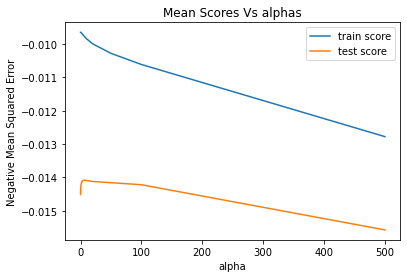

In [76]:
rcv_results['param_alpha'] = rcv_results['param_alpha'].astype('float64')

#plotting
plt.plot(rcv_results['param_alpha'], rcv_results['mean_train_score'])
plt.plot(rcv_results['param_alpha'], rcv_results['mean_test_score'])

#axes labelling
plt.xlabel('alpha')
plt.ylabel('Negative Mean Squared Error')

#title of the plot
plt.title("Mean Scores Vs alphas")

#legend of the graph
plt.legend(['train score', 'test score'], loc='upper right')

plt.show()

In [77]:
#best estimator for lambda

model_ridge_cv.best_estimator_

Ridge(alpha=6.0)

In [78]:
alpha = 6.0
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
ridge.coef_

array([-3.03116797e-03,  1.24231213e-02,  1.29452521e-02,  6.85989015e-02,
        4.23045281e-02,  5.91762864e-03,  1.52105483e-02, -1.44943396e-02,
        5.72853729e-02,  3.22107804e-02,  3.40673386e-02,  6.41344166e-02,
        5.50440989e-03,  8.01867659e-03,  1.24815284e-02,  5.68657429e-03,
        1.17345473e-02,  2.90581448e-02,  1.38277717e-02,  1.01053560e-02,
        1.40352000e-02, -2.58208647e-02, -1.25925003e-02,  4.63276089e-03,
        2.47687888e-03,  1.18793888e-02,  1.04540161e-02,  1.01279801e-02,
        1.44793677e-02,  1.13542028e-02,  1.21859576e-03,  1.55372469e-02,
       -1.43722664e-02,  5.52231172e-03,  4.73509155e-03,  4.79748118e-04,
        1.04396934e-03,  1.47277032e-02,  5.72169566e-02,  2.60922099e-02,
        1.01121851e-01,  7.26979023e-02, -3.09537776e-03, -7.76250498e-03,
        5.98469618e-03, -6.68994271e-03, -4.84035514e-03,  1.64470041e-02,
       -1.99493665e-02, -5.90817013e-03, -1.36572487e-02, -1.31607546e-02,
       -9.22033921e-03, -

###### MSE value for Ridge Regression

In [79]:
#mean squared error (MSE)

MSE(y_test, ridge.predict(X_test))

0.014996990446979804

In [80]:
#Features and coefficient in one dataframe

df_ridge = pd.DataFrame({'Features':X_train.columns, 'Coefficient':ridge.coef_.round(4)})
df_ridge.sort_values('Coefficient', axis=0, ascending=False, inplace=True)
df_ridge

,Features,Coefficient
40,MSZoning_RL,0.1011
41,MSZoning_RM,0.0727
3,OverallQual,0.0686
11,GrLivArea,0.0641
8,TotalBsmtSF,0.0573
...,...,...
58,Neighborhood_OldTown,-0.0193
48,Neighborhood_Edwards,-0.0199
68,RoofStyle_Hip,-0.0234
21,BuiltOrRemodelAge,-0.0258


Let's now assign these features a coefficient and stored them in one dictionary.

In [81]:
#coefficient dictionary
coeff_ridge_dict = dict(pd.Series(ridge.coef_.round(4), index = X_train.columns))
coeff_ridge_dict

{'MSSubClass': -0.003,
 'LotFrontage': 0.0124,
 'LotArea': 0.0129,
 'OverallQual': 0.0686,
 'OverallCond': 0.0423,
 'MasVnrArea': 0.0059,
 'BsmtFinSF1': 0.0152,
 'BsmtUnfSF': -0.0145,
 'TotalBsmtSF': 0.0573,
 '1stFlrSF': 0.0322,
 '2ndFlrSF': 0.0341,
 'GrLivArea': 0.0641,
 'BsmtFullBath': 0.0055,
 'FullBath': 0.008,
 'HalfBath': 0.0125,
 'BedroomAbvGr': 0.0057,
 'Fireplaces': 0.0117,
 'GarageCars': 0.0291,
 'WoodDeckSF': 0.0138,
 'OpenPorchSF': 0.0101,
 'OldOrNewGarage': 0.014,
 'BuiltOrRemodelAge': -0.0258,
 'IsRemodelled': -0.0126,
 'new_LotShape': 0.0046,
 'new_ExterQual': 0.0025,
 'new_BsmtQual': 0.0119,
 'new_BsmtExposure': 0.0105,
 'new_BsmtFinType1': 0.0101,
 'new_HeatingQC': 0.0145,
 'new_KitchenQual': 0.0114,
 'new_FireplaceQu': 0.0012,
 'new_GarageFinish': 0.0155,
 'new_BldgType': -0.0144,
 'new_HouseStyle': 0.0055,
 'new_Fence': 0.0047,
 'new_LotConfig': 0.0005,
 'new_MasVnrType': 0.001,
 'new_SaleCondition': 0.0147,
 'MSZoning_FV': 0.0572,
 'MSZoning_RH': 0.0261,
 'MSZoning_

Let's now work to find the significant variables from ridge regression needed to the organization!!

In [82]:
X_train_ridge = X_train[df_ridge.Features]

#linear regression
lm = LinearRegression()
lm.fit(X_train_ridge, y_train)

#rfe
rfe = RFE(lm, 15)            
rfe = rfe.fit(X_train_ridge, y_train)

#function to get coefficient values
def find(x):
    return coeff_ridge_dict[x]

#assign top features to temp dataframe
ridge_temp = pd.DataFrame(list(zip( X_train_ridge.columns, rfe.support_)), columns=['Features', 'rfe_support'])
ridge_temp = ridge_temp.loc[ridge_temp['rfe_support'] == True]
ridge_temp['Coefficient'] = ridge_temp['Features'].apply(find)

#top 10 features
ridge_temp = ridge_temp.sort_values(by=['Coefficient'], ascending=False)
ridge_temp = ridge_temp.head(10)
ridge_temp

,Features,rfe_support,Coefficient
0,MSZoning_RL,True,0.1011
1,MSZoning_RM,True,0.0727
2,OverallQual,True,0.0686
4,TotalBsmtSF,True,0.0573
5,MSZoning_FV,True,0.0572
6,Foundation_PConc,True,0.0433
7,OverallCond,True,0.0423
8,2ndFlrSF,True,0.0341
9,1stFlrSF,True,0.0322
11,GarageCars,True,0.0291


###### Ridge Regression Significant Variables

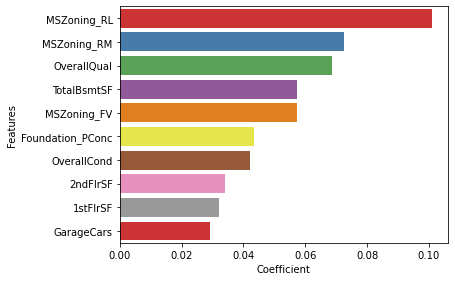

In [83]:
plt.figure(figsize=(20,20))
plt.subplot(4,3,1)

#bar plot
sns.barplot(y ='Features', x='Coefficient', palette='Set1', data = ridge_temp)
plt.show()

The graph is the top 10 features under Ridge Regression that clearly defines the most significant variables amongst the rest. The plot shows that the variable "MSZoning_RL" is highly significant in the Ridge Regression.

#### Lasso Regression

In [84]:
#defining a classifier lasso for class Lasso()
lasso = Lasso()

#using GridSearch cross-validation
model_lasso_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_squared_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

#model fitting
model_lasso_cv.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    3.4s finished


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_squared_error',
             verbose=1)

In [85]:
#displaying mean scores
lcv_results = pd.DataFrame(model_lasso_cv.cv_results_)
lcv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.117297,0.093040,0.007123,0.003676,0.0001,{'alpha': 0.0001},-0.014749,-0.015382,-0.013453,-0.014199,-0.013017,-0.014160,0.000854,1,-0.009359,-0.009426,-0.009793,-0.009592,-0.010221,-0.009678,0.000310
1,0.025770,0.010693,0.003923,0.003579,0.001,{'alpha': 0.001},-0.016022,-0.015006,-0.012375,-0.013362,-0.014114,-0.014176,0.001265,2,-0.009821,-0.009866,-0.010256,-0.010062,-0.010628,-0.010127,0.000295
2,0.014331,0.004623,0.003543,0.004371,0.01,{'alpha': 0.01},-0.018173,-0.015583,-0.011955,-0.014962,-0.013736,-0.014882,0.002060,3,-0.012319,-0.012951,-0.013244,-0.012892,-0.013054,-0.012892,0.000311
3,0.009588,0.003201,0.005501,0.003252,0.05,{'alpha': 0.05},-0.029880,-0.030217,-0.020832,-0.024650,-0.020944,-0.025304,0.004111,4,-0.023315,-0.024312,-0.025206,-0.023880,-0.024607,-0.024264,0.000641
4,0.007480,0.003019,0.005292,0.004413,0.1,{'alpha': 0.1},-0.047523,-0.054488,-0.037280,-0.039243,-0.034394,-0.042586,0.007382,5,-0.040929,-0.042235,-0.042484,-0.041263,-0.041590,-0.041700,0.000583


###### Plot : mean scores Vs alphas

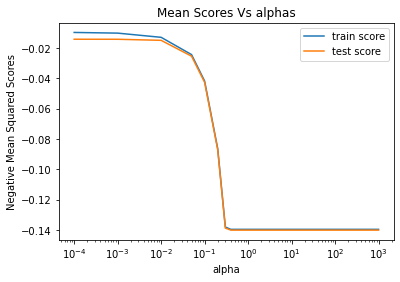

In [86]:
lcv_results['param_alpha'] = lcv_results['param_alpha'].astype('float64')

#plotting
plt.plot(lcv_results['param_alpha'], lcv_results['mean_train_score'])
plt.plot(lcv_results['param_alpha'], lcv_results['mean_test_score'])

#axes labelling
plt.xlabel('alpha')
plt.ylabel('Negative Mean Squared Scores')

#title of the plot
plt.title("Mean Scores Vs alphas")

#legend of the graph
plt.legend(['train score', 'test score'], loc='upper right')

plt.xscale('log')
plt.show()

In [87]:
#best estimator for lambda

model_lasso_cv.best_estimator_

Lasso(alpha=0.0001)

In [88]:
alpha = 0.0001
lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 
lasso.coef_

array([-1.37093206e-03,  1.23731893e-02,  1.27612145e-02,  6.91297575e-02,
        4.22939890e-02,  5.69279832e-03,  1.38784254e-02, -1.66224413e-02,
        5.99573652e-02,  2.31164030e-02,  2.46995772e-02,  7.67577474e-02,
        4.59107721e-03,  6.72029496e-03,  1.12287786e-02,  4.97979941e-03,
        1.14598403e-02,  3.01222929e-02,  1.35596192e-02,  9.83599900e-03,
        1.42051536e-02, -2.58911316e-02, -1.24588174e-02,  4.22268709e-03,
        1.63165972e-03,  1.22489970e-02,  1.05066098e-02,  9.76247765e-03,
        1.44759535e-02,  1.08323503e-02,  1.11134933e-03,  1.60861963e-02,
       -1.50216587e-02,  4.45033327e-03,  4.34059808e-03,  4.03200896e-04,
        1.39459633e-03,  1.44211563e-02,  7.67201014e-02,  3.54098978e-02,
        1.37800395e-01,  1.01450720e-01, -2.68158002e-03, -6.39470665e-03,
        7.80531316e-03, -6.39092413e-03, -3.37239826e-03,  1.72233718e-02,
       -1.86379147e-02, -4.76611480e-03, -8.67840655e-03, -1.19036172e-02,
       -8.28491217e-03, -

###### MSE value of Lasso Regression

In [100]:
#mean squared error (MSE)
lasso_pred = lasso.predict(X_test)
MSE(y_test, lasso_pred)

0.015020663184932805

In [90]:
#Features and coefficient in one dataframe
df_lasso = pd.DataFrame({'Features':X_train.columns, 'Coefficient':lasso.coef_.round(4)})
df_lasso = df_lasso[df_lasso['Coefficient'] != 0.00]

df_lasso.sort_values('Coefficient', axis=0, ascending=False, inplace=True)
df_lasso

,Features,Coefficient
40,MSZoning_RL,0.1378
41,MSZoning_RM,0.1015
11,GrLivArea,0.0768
38,MSZoning_FV,0.0767
3,OverallQual,0.0691
...,...,...
53,Neighborhood_NAmes,-0.0170
48,Neighborhood_Edwards,-0.0186
21,BuiltOrRemodelAge,-0.0259
68,RoofStyle_Hip,-0.0263


Let's now assign these features a coefficient and stored them in one dictionary.

In [91]:
#coefficient dictionary
coeff_lasso_dict = dict(pd.Series(ridge.coef_.round(4), index = X_train.columns))
coeff_lasso_dict

{'MSSubClass': -0.003,
 'LotFrontage': 0.0124,
 'LotArea': 0.0129,
 'OverallQual': 0.0686,
 'OverallCond': 0.0423,
 'MasVnrArea': 0.0059,
 'BsmtFinSF1': 0.0152,
 'BsmtUnfSF': -0.0145,
 'TotalBsmtSF': 0.0573,
 '1stFlrSF': 0.0322,
 '2ndFlrSF': 0.0341,
 'GrLivArea': 0.0641,
 'BsmtFullBath': 0.0055,
 'FullBath': 0.008,
 'HalfBath': 0.0125,
 'BedroomAbvGr': 0.0057,
 'Fireplaces': 0.0117,
 'GarageCars': 0.0291,
 'WoodDeckSF': 0.0138,
 'OpenPorchSF': 0.0101,
 'OldOrNewGarage': 0.014,
 'BuiltOrRemodelAge': -0.0258,
 'IsRemodelled': -0.0126,
 'new_LotShape': 0.0046,
 'new_ExterQual': 0.0025,
 'new_BsmtQual': 0.0119,
 'new_BsmtExposure': 0.0105,
 'new_BsmtFinType1': 0.0101,
 'new_HeatingQC': 0.0145,
 'new_KitchenQual': 0.0114,
 'new_FireplaceQu': 0.0012,
 'new_GarageFinish': 0.0155,
 'new_BldgType': -0.0144,
 'new_HouseStyle': 0.0055,
 'new_Fence': 0.0047,
 'new_LotConfig': 0.0005,
 'new_MasVnrType': 0.001,
 'new_SaleCondition': 0.0147,
 'MSZoning_FV': 0.0572,
 'MSZoning_RH': 0.0261,
 'MSZoning_

Let's now work to find the significant variables from lasso regression needed to the organization!!

In [92]:
X_train_lasso = X_train[df_lasso.Features]

#linear regression
lm1 = LinearRegression()
lm1.fit(X_train_lasso, y_train)

#rfe
rfe = RFE(lm1, 15)            
rfe = rfe.fit(X_train_lasso, y_train)

#function to get coefficient values
def find(x):
    return coeff_lasso_dict[x]

#assign top features to temp dataframe
lasso_temp = pd.DataFrame(list(zip( X_train_lasso.columns, rfe.support_)), columns=['Features', 'rfe_support'])
lasso_temp = lasso_temp.loc[lasso_temp['rfe_support'] == True]
lasso_temp['Coefficient'] = lasso_temp['Features'].apply(find)

#top 10 features
lasso_temp = lasso_temp.sort_values(by=['Coefficient'], ascending=False)
lasso_temp = lasso_temp.head(10)
lasso_temp

,Features,rfe_support,Coefficient
0,MSZoning_RL,True,0.1011
1,MSZoning_RM,True,0.0727
4,OverallQual,True,0.0686
5,TotalBsmtSF,True,0.0573
3,MSZoning_FV,True,0.0572
6,Foundation_PConc,True,0.0433
7,OverallCond,True,0.0423
12,2ndFlrSF,True,0.0341
13,1stFlrSF,True,0.0322
10,GarageCars,True,0.0291


###### Lasso Regression Significant Variables

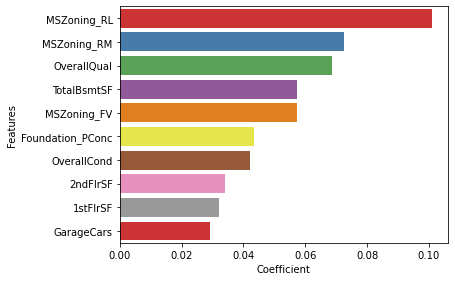

In [93]:
plt.figure(figsize=(20,20))
plt.subplot(4,3,1)

#bar plot
sns.barplot(y ='Features', x='Coefficient', palette='Set1', data = lasso_temp)
plt.show()

The graph is the top 10 features under Lasso Regression that clearly defines the most significant variables amongst the rest. Here also, the plot shows that the variable "MSZoning_RL" is highly significant in the Lasso Regression.

### Summary

Following the several points that tell us about the conclusion of the project - Surprise Housing Price Prediction :
1. The target variable is : SalePrice
2. The optimal value of alpha predicted for: 
    * Ridge Regression : 6.0
    * Lasso Regression : 0.0001
3. The mean-squared-error (MSE) value comes out to be for:
    * Ridge Regression : 0.014996
    * Lasso Regression : 0.015020
4. As from the above conclusion, we found that MSE(lasso) > MSE(ridge), this clearly shows that lasso is more appropriate regression method here.

### Conclusion

Following are the points that the company wants to know :

1. Which variables are significant in predicting the price of a house?
    * MSZoning_RL
    * MSZoning_RM
    * OverallQual
    * TotalBsmtSF
    * MSZoning_FV
    * Foundation_PConc
    * OverallCond
    * 2ndFlrSF
    * 1stFlrSF
    * GarageCars
    

2. How well those variables describe the price of a house?
    * MSZoning_RL is highly significant variable that describe the price of the house.
    * Other top variables are well explained in the bar plot as shown above.
    

3. Determine the optimal value of lambda for ridge and lasso regression.
    * The optimal value of lambda predicted for ridge regression is : 6.0 
    * The optimal value of lambda predicted for lasso regression is : 0.0001

## Submission file

In [104]:
# Read in sample_submission dataframe
submission = pd.read_csv(r"sample_submission.csv")
submission.shape

(1459, 2)

In [105]:
# Append predictions from Lasso models
# lasso_prediction = 0.1 * lasso_pred

# submission.iloc[:,1] = np.floor(np.expm1(lasso_prediction))

In [106]:
# Fix outleir predictions
q1 = submission['SalePrice'].quantile(0.0045)
q2 = submission['SalePrice'].quantile(0.99)
submission['SalePrice'] = submission['SalePrice'].apply(lambda x: x if x > q1 else x*0.77)
submission['SalePrice'] = submission['SalePrice'].apply(lambda x: x if x < q2 else x*1.1)
submission.to_csv("submission1.csv", index=False)

In [107]:
# Scale predictions
submission['SalePrice'] *= 1.001619
submission.to_csv("submission2.csv", index=False)